# Laboratorio 1: Exploración de Datos.

### Implementación:

#### Se deberá presentar al menos la siguiente información:
1. Estadísticas descriptivas:
    * Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?
    * Realizar un análisis de outliers.
    * Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.
2. Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
    * Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.
3. Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

#### Se evaluarán los siguientes aspectos:
1. Estructura legible de la notebook.
2. Los tipos de gráficos son adecuados para la información representada.




****
#### En primer lugar, importamos las librerías con las que vamos a trabajar: pandas, matplotlib, seaborn, etc.

In [477]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# a bit of machine learning
from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

#### Seguidamente, necesitamos leer el dataset, el cual, en este caso fue sacado de la página de Kaggle "We are from our childhood":

In [478]:
young = pd.read_csv('responses.csv')

#### Para corroborar que hayamos leído correctamente el dataset y no surja ningún error más adelante, procedemos a mostrar una pequeña sección del mismo:

In [479]:
young.head(5) #Mostramos 5 filas de la tabla 

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

#### Si observamos la tabla anterior podemos hacernos una idea del contenido del dataset, el cual consta de diferentes categorías como por ejemplo: música, arte, religión, edad, etc. A su vez, las respuestas de las diferentes categorías están representadas en una escala numérica del 1 al 5, donde 1 significa "No lo disfruto para nada" y 5 significa "Lo disfruto mucho".

*****
## Punto 1: 
#### Como ya tenemos las librerías importadas y el dataset cargado, vamos a proceder a mostrar las estadísticas básicas del dataset, para ello utilizamos la función describe() que provee pandas, la cual nos permite mostrar la cuenta, la media, la deviación estándar, el valor mínimo, el primer cuartil, el segundo cuartil ó mediana, el tercer cuartil y el valor máximo, de cada una de las columnas (ó categorías) del dataset:

In [480]:
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

#### Con un rápido vistazo podemos ver que a la mayoría de las personas les gusta la Música, ya que el valor medio de dicha categoría es de $\mu=4.7$

#### Si bien en la tabla anterior se muestran los estadísticos básicos de cada una de las categorías, la consigna pide segmentar por edad y peso. Para ello, en lugar de la función describe(), utilizamos otras funciones como mean(), std(), etc y segmentamos por edad y peso, ó lo que es lo mismo decir, nos quedamos con las columnas de edad y peso.

#### A continuación tabulamos los valores de la moda, media, mediana y desviación estándar según el peso y la edad. Además, aprovechamos para mostrar también la varianza, el valor máximo, mínimo, la suma de valores y la cuenta de los mismos:

In [481]:
estadisticos = pd.DataFrame({'Edad':[young.Age.mode()[0],young.Age.mean(),
                                    young.Age.median(),young.Age.std(),
                                   young.Age.min(),young.Age.max(),
                                    young.Age.var(),young.Age.sum(),
                                    young.Age.count()],
                            'Peso':[young.Weight.mode()[0],young.Weight.mean(),
                                    young.Weight.median(),young.Weight.std(),
                                   young.Weight.min(),young.Weight.max(),
                                    young.Weight.var(),young.Weight.sum(),
                                    young.Weight.count()]},
                           index=['Moda','Media','Mediana','Desviación Estándar',
                                  'Valor Mínimo','Valor Máximo','Varianza',
                                 'Suma de Valores','Cuenta de Valores'])
display(estadisticos)

,Edad,Peso
Moda,19.000000,60.000000
Media,20.433699,66.405051
Mediana,20.000000,64.000000
Desviación Estándar,2.828840,13.839561
Valor Mínimo,15.000000,41.000000
Valor Máximo,30.000000,165.000000
Varianza,8.002336,191.533443
Suma de Valores,20495.000000,65741.000000
Cuenta de Valores,1003.000000,990.000000


#### Lo que vamos a analizar a continuación es la distribución de frecuencias según la edad y el peso. Para ello generamos un contenedor de edades que nos va a permitir poder segmentar en rangos etarios, para luego contar la cantidad de personas en cada rango definido.

### Distribución de Frecuencias por Edad y Peso:

In [482]:
contenedores_edad = np.arange(0,51.,10)
frec_edad = pd.cut(young['Age'],contenedores_edad)
tabla_frec_edad = pd.value_counts(frec_edad)
print("\nDistribución de Frecuencias por Edad:")
tabla_frec_edad


Distribución de Frecuencias por Edad:


(10.0, 20.0]    620
(20.0, 30.0]    383
(40.0, 50.0]      0
(30.0, 40.0]      0
(0.0, 10.0]       0
Name: Age, dtype: int64

In [483]:
contenedores_peso = np.arange(30,171.,10)
frec_pesos = pd.cut(young['Weight'],contenedores_peso)
tabla_frec_pesos = pd.value_counts(frec_pesos)
print("\nDistribución de Frecuencias por Peso:")
tabla_frec_pesos


Distribución de Frecuencias por Peso:


(50.0, 60.0]      321
(60.0, 70.0]      239
(70.0, 80.0]      194
(40.0, 50.0]      100
(80.0, 90.0]       97
(90.0, 100.0]      27
(110.0, 120.0]      5
(100.0, 110.0]      4
(160.0, 170.0]      1
(140.0, 150.0]      1
(120.0, 130.0]      1
(150.0, 160.0]      0
(130.0, 140.0]      0
(30.0, 40.0]        0
Name: Weight, dtype: int64

### Histograma por Edad y Peso:
#### A continuación graficamos los histogramas correspondientes

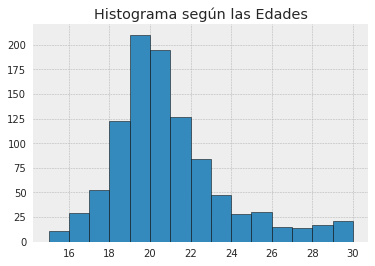

In [484]:
plt.title('Histograma según las Edades')
plt.hist(young['Age'].dropna(), edgeColor='black',bins=15);

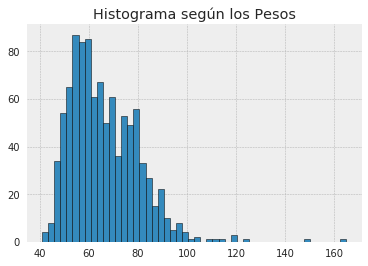

In [485]:
plt.title('Histograma según los Pesos')
plt.hist(young['Weight'].dropna(), edgeColor='black',bins=50);

#### Si bien los histogramas anteriores nos dan una idea de la distribución aproximada a que responden, podemos hacer uso de seaborn y la función distplot() para poder mostrarlo de una manera más agradable y clara, graficando la distribución aproximada junto con el histograma:

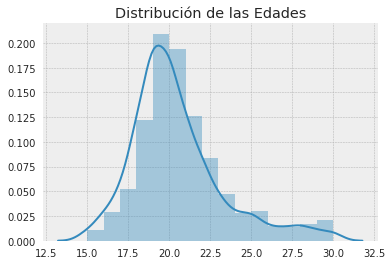

In [486]:
age_hist = np.array(young.Age.dropna())
sns.distplot(age_hist, bins=15).set_title("Distribución de las Edades");


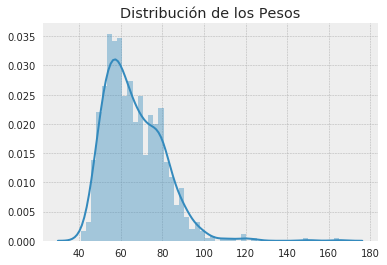

In [487]:
weight_hist = np.array(young.Weight.dropna())
sns.distplot(weight_hist, bins=50).set_title("Distribución de los Pesos");

#### Como podemos ver en las imágenes anteriores, ambas distribuciones se asemejan a la distribución normal, aunque la distribución de las edades en mayor medida, debido a que en la distribución de los pesos existe un pequeño lóbulo secundario cerca del lóbulo principal, sin embargo se aprecia la tendencia hacia una distribución normal, en ambos casos.

****
### Análisis de Outliers
#### En primer lugar vamos a explicar brevemente el significado de "outlier". Un "outlier" ó valor atípico es una observación que es numéricamente distante del resto de los datos. Las estadísticas derivadas de los conjuntos de datos que incluyen valores atípicos serán frecuentemente engañosas. Por ejemplo, en el cálculo de la temperatura media de 10 objetos en una habitación, si la mayoría tienen entre 20 y 25 ºC, pero hay un horno a 350 °C, la mediana de los datos puede ser 23, pero la temperatura media será 55. En este caso, la mediana refleja mejor la temperatura de la muestra al azar de un objeto que la media. Los valores atípicos pueden ser indicativos de datos que pertenecen a una población diferente del resto de las muestras establecidas.


#### En primer lugar nos vamos a centrar en las diferencias en altura, peso y edad entre personas de zonas urbanas y rurales:

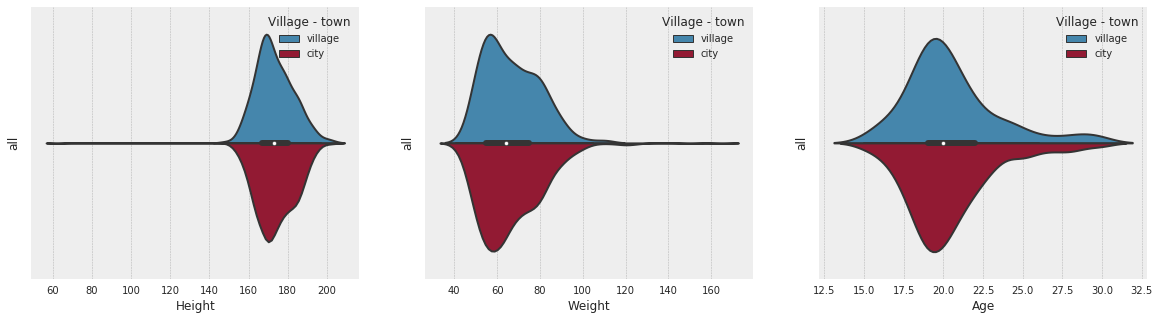

In [488]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
young["all"] = ""

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0])
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1])
data = young.dropna(subset=['Age'])
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2])

#_ = sns.distplot(young[young[var_of_interest]=='village'].Age.dropna(),label = 'village', ax = ax[2], kde = False,bins = 30)
#_ = sns.distplot(young[young[var_of_interest]=='city'].Age.dropna(),label = 'city', ax = ax[2], kde = False,bins = 30)

#### Si desglosamos por el lugar donde viven las personas (campo y ciudad), podemos observar que si bien existen diferencias de altura, peso y edad, estas son mínimas. Si miramos los gráficos de violín y contrastamos las gráficas azules (campo) con las gráficas rojas (ciudad), no se observan grandes diferencias.

#### Vamos a crear una función en python, remove_outlier(), que nos permite eliminar los valores atípicos, para ello necesitamos calcular los cuartiles $Q_1$ y $Q_3$, con los cuales calcularemos el rango intercuartilico definido como $Q_3-Q_1$. Seguidamente, necesitamos calcular los límites inferior y superior, fuera de los cuales se considerará un valor atípico ó outlier. El límite inferior se define como $L_{inf}=Q_1-1.5 \cdot R_{IQ}$ y el límite superior como $L_{sup}=Q_3+1.5 \cdot R_{IQ}$

Límites de Outliers para Altura:
Límite superior = 199.5
Límite inferior = 147.5

Límites de Outliers para Peso:
Límite superior = 105.0
Límite inferior = 25.0

Límites de Outliers para Edad:
Límite superior = 26.5
Límite inferior = 14.5



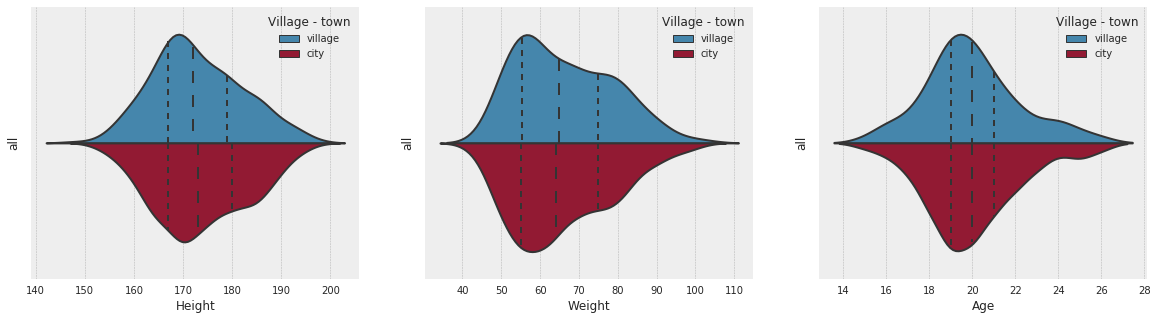

In [489]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) #1er Cuartil
    q3 = df_in[col_name].quantile(0.75) #3er Cuartil
    iqr = q3-q1 #Rango intercuartilico
    fence_low  = q1-1.5*iqr #Limite inferior 
    fence_high = q3+1.5*iqr #Limite superior
    print("Límite superior = "+str(fence_high))
    print("Límite inferior = "+str(fence_low)+'\n')
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] #Filtrado de outliers
    return df_out

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
print("Límites de Outliers para Altura:")
data = remove_outlier(data,'Height')
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0], inner = 'quartile')
data = young.dropna(subset=['Weight'])
print("Límites de Outliers para Peso:")
data = remove_outlier(data,'Weight')
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1], inner = 'quartile')
data = young.dropna(subset=['Age'])
print("Límites de Outliers para Edad:")
data = remove_outlier(data,'Age')
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2], inner = 'quartile')

#### Lo que logramos removiendo los valores atípicos, es excluir de la visualización aquellos datos que caen fuera de los límites superior e inferior. Estos datos pueden deberse a datos reales que están lejos de los datos del grueso de las personas o bien a datos mal registrados, mal medidos, errores, etc. Por tal motivo, see justifica su exclusión.

### Desglosamiento por género:
#### Anteriormente analizamos las diferencias en altura, peso y edad, segmentando los datos entre las personas que viven en el campo, de las que viven en la ciudad. Ahora nos centramos en las diferencias en altura, peso y edad entre los géneros masculino y femenino:

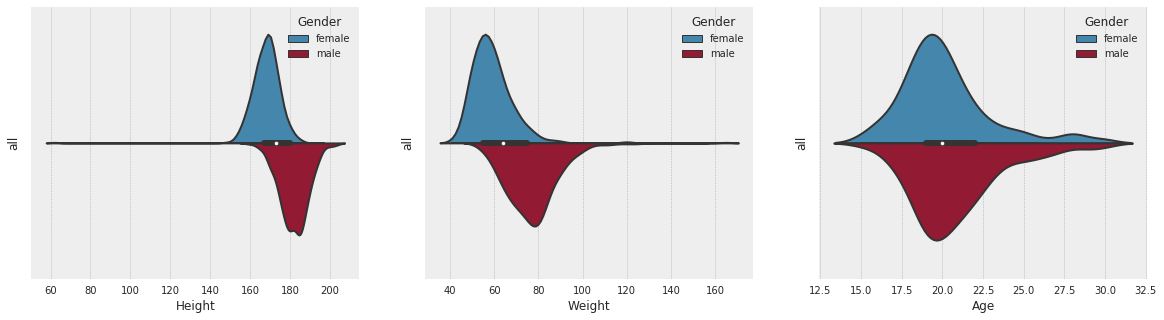

In [490]:
var_of_interest = 'Gender'
mapping = {var_of_interest: {'female': 0, 'male': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
young["all"] = ""

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0])
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1])
data = young.dropna(subset=['Age'])
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2])

#_ = sns.distplot(young[young[var_of_interest2]=='female'].Age.dropna(),label = 'female', ax = ax[2], kde = False,bins = 30)
#_ = sns.distplot(young[young[var_of_interest2]=='male'].Age.dropna(),label = 'male', ax = ax[2], kde = False,bins = 30)

#### En ésta situación los resultados muestran una mayor diferencia entre los géneros (con respecto al desglosamiento por lugar donde viven). Claramente podemos observar como los hombres poseen una distribución de las alturas y pesos, más desplazados a la derecha que las mujeres, lo que se traduce en que los hombres son más altos y más pesados que las mujeres (algo que se condice con el "saber" popular). Además, si vemos la distribución de las edades podemos notar que son virtualmente las mismas, esto quiere decir que los rangos etarios son muy parecidos, por lo tanto estamos comparando los pesos y las alturas para un rango etario muy similar.

#### Nuevamente, utilizamos la función remove_outlier(), para remover los valores atípicos de nuestro análisis:

Límites de Outliers para Altura:
Límite superior = 199.5
Límite inferior = 147.5

Límites de Outliers para Peso:
Límite superior = 105.0
Límite inferior = 25.0

Límites de Outliers para Edad:
Límite superior = 26.5
Límite inferior = 14.5



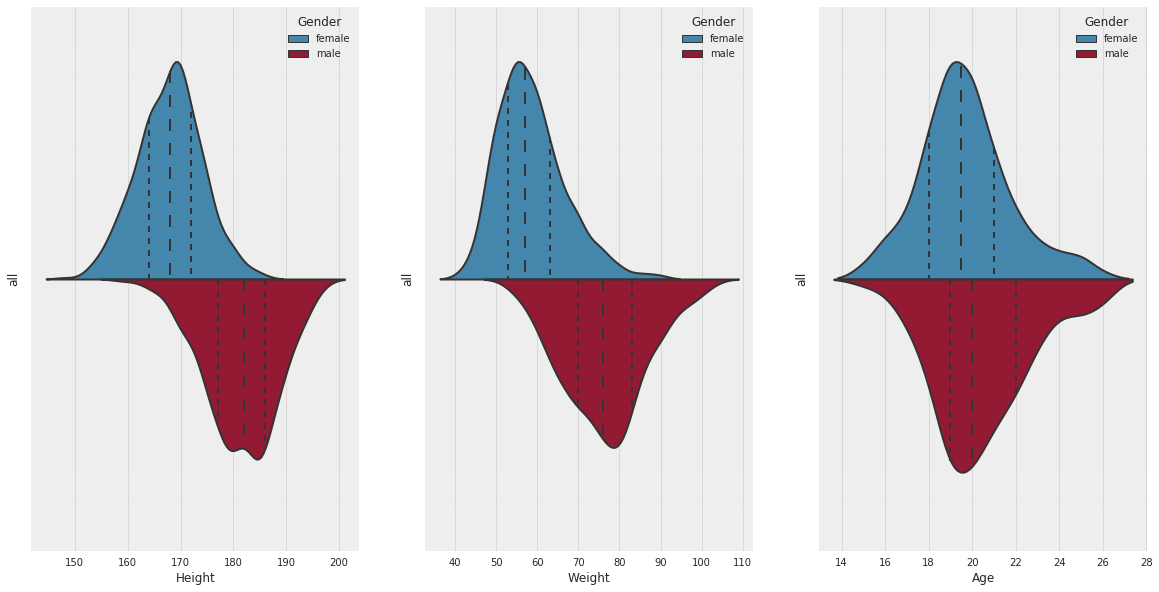

In [491]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) #1er Cuartil
    q3 = df_in[col_name].quantile(0.75) #3er Cuartil
    iqr = q3-q1 #Rango intercuartilico
    fence_low  = q1-1.5*iqr #Limite inferior
    fence_high = q3+1.5*iqr #Limite superior
    print("Límite superior = "+str(fence_high))
    print("Límite inferior = "+str(fence_low)+'\n')
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)] #Filtrado de outliers
    return df_out

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
data = young.dropna(subset=['Height'])
print("Límites de Outliers para Altura:")
data = remove_outlier(data,'Height')
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0], inner = 'quartile')
data = young.dropna(subset=['Weight'])
print("Límites de Outliers para Peso:")
data = remove_outlier(data,'Weight')
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1], inner = 'quartile')
data = young.dropna(subset=['Age'])
print("Límites de Outliers para Edad:")
data = remove_outlier(data,'Age')
_ = sns.violinplot(x='Age', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[2], inner = 'quartile')

#### Al remover los outliers, podemos tener una mejor visualización de las gráficas de violín.

### Correlación

In [492]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical variables
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

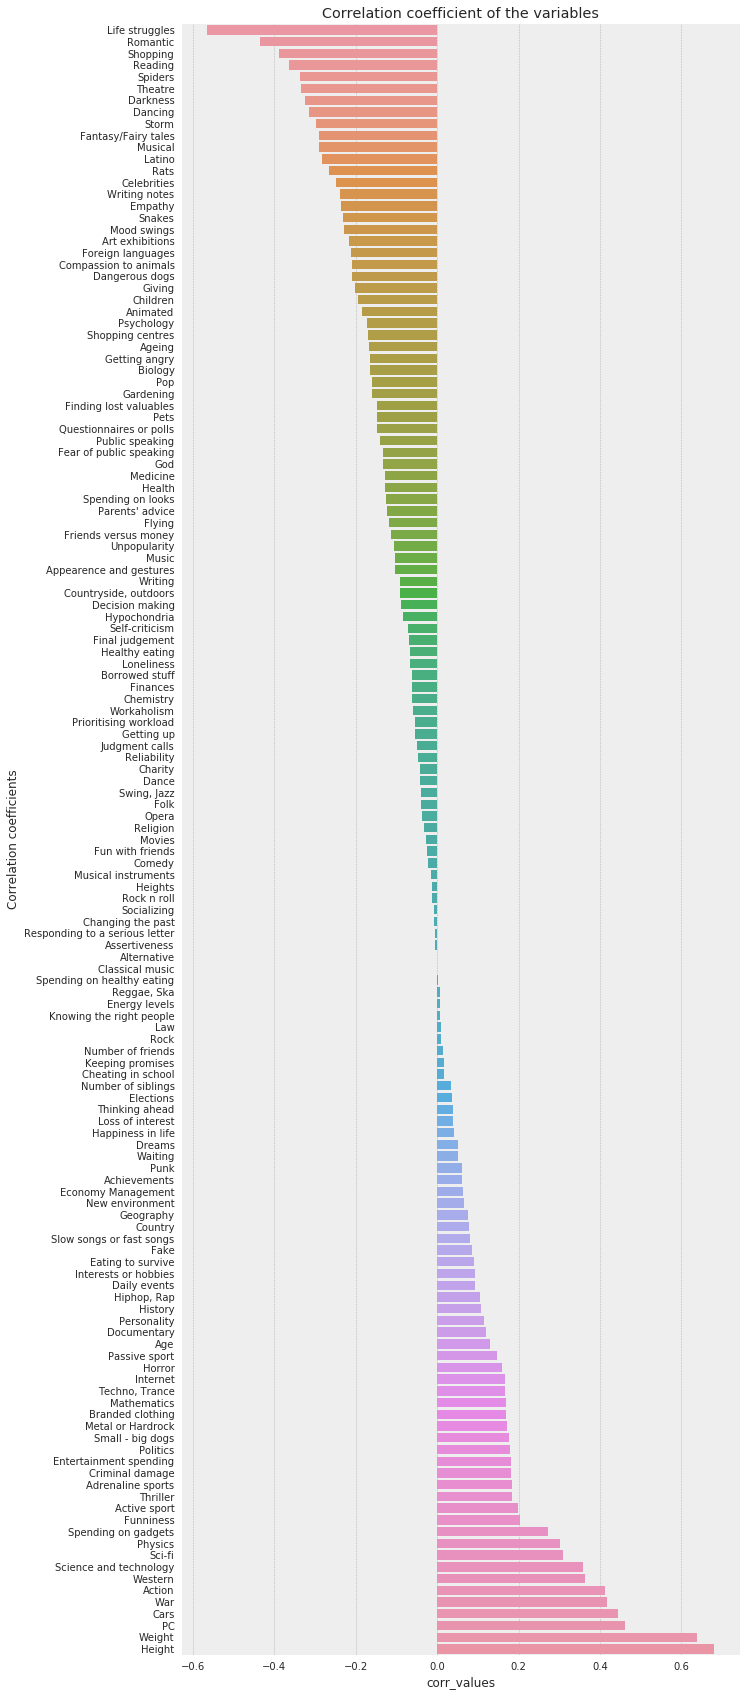

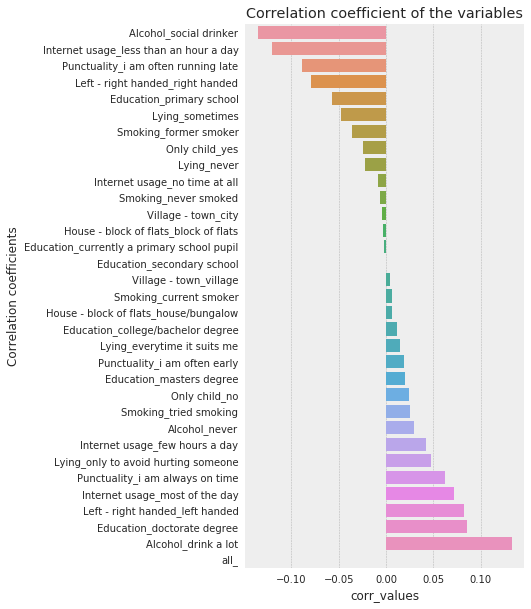

In [493]:
var_of_interest = 'Gender'
mapping = {var_of_interest: {'female': 0, 'male': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

corrs_area = correlation_plot(var_of_interest, young, mapping)

#### Vamos a analizar cuales son las correlaciones más fuertes que tenemos entre las diferentes variables y los géneros, recordemos que un valor alto de correlación puede ser tanto positiva como negativa, por lo cual tenemos que tener en cuenta esos dos casos, además tenemos variables categóricas y no categóricas, por lo cuanl tendremos en total 4 valores de correlación:

In [494]:
#The strongest correlations that we have are  
corr_num = corrs_area[0]
corr_cats = corrs_area[1]
print("Máxima correlación positiva - Varible Numérica:")
display(corr_num[corr_num.corr_values == max(corr_num.corr_values)])
print("\n\nMínima correlación negativa - Varible Numérica:")
display(corr_num[corr_num.corr_values == min(corr_num.corr_values)])
print("\n\nMáxima correlación positiva - Varible Categórica:")
display(corr_cats[corr_cats.corr_values == max(corr_cats.corr_values)])
print("\n\nMínima correlación negativa - Varible Categórica:")
display(corr_cats[corr_cats.corr_values == min(corr_cats.corr_values)])

Máxima correlación positiva - Varible Numérica:


,corr_values,features
136,0.680314,Height




Mínima correlación negativa - Varible Numérica:


,corr_values,features
118,-0.564743,Life struggles




Máxima correlación positiva - Varible Categórica:


,corr_values,features
4,0.13267,Alcohol_drink a lot




Mínima correlación negativa - Varible Categórica:


,corr_values,features
6,-0.135223,Alcohol_social drinker


#### La máxima correlación positiva se presenta entre el género y el peso, la mínima correlación negativa se presenta entre los problemas de la vida y el género. Y en menor medida, tenemos una correlación más pequeña entre el género y el consumo de alcohol.

****
## Punto 2:

### Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables: alcohol y tabaquismo.

#### Para ello vamos a definir los conceptos de probabilidad marginal y probabilidad conjunta:
#### Probabilidad Marginal: Probabilidad de una variable sin considerar otra, por ejemplo.
$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### En primer lugar mostramos las probabilidades marginales de la variable tabaquismo y también mostramos un gráfico con dichos resultados:

Tabla de Frecuencia de Probabilidades por Tabaquismo:

Años: 		  Probabilidades:
tried smoking     0.428427
never smoked      0.207661
current smoker    0.189516
former smoker     0.174395
Name: Smoking, dtype: float64


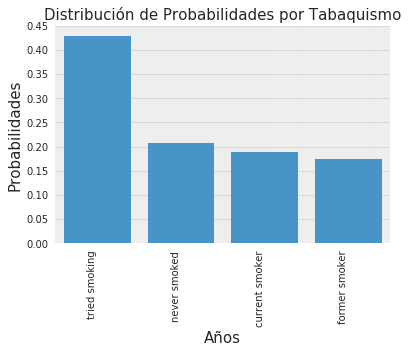

In [495]:
fdp_fumador = young.Smoking.value_counts(normalize=True)

print("Tabla de Frecuencia de Probabilidades por Tabaquismo:\n")
print("Años: \t\t  Probabilidades:")
print(fdp_fumador)

plt.figure()
ax = sns.barplot(data=fdp_fumador.to_frame().reset_index(),
    x='index', y='Smoking', color='#3498db')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
ax.set_title("Distribución de Probabilidades por Tabaquismo",fontsize=15)
ax.set_xlabel("Años",fontsize=15)
ax.set_ylabel("Probabilidades",fontsize=15)
sns.despine()

#### Seguidamente, mostramos las probabilidades marginales de la variable alcohol y también mostramos un gráfico con dichos resultados:

Tabla de Frecuencia de Probabilidades por Consumo de Alcohol:

Años: 		  Probabilidades:
social drinker    0.655276
drink a lot       0.221106
never             0.123618
Name: Alcohol, dtype: float64


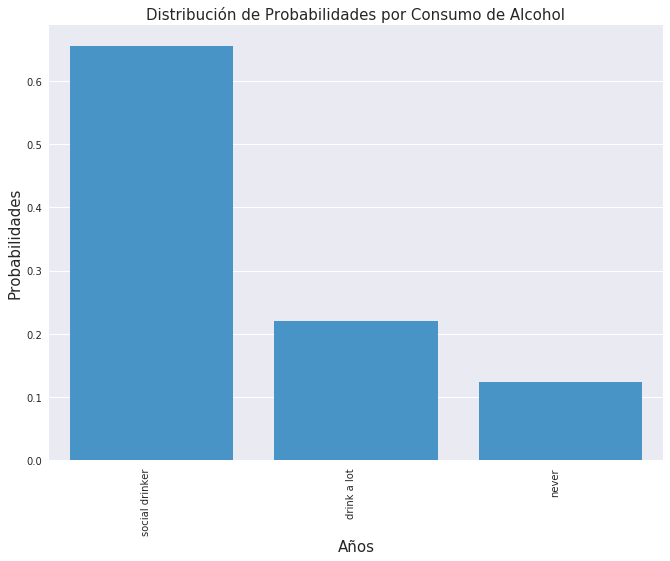

In [496]:
fdp_alcohol = young.Alcohol.value_counts(normalize=True)

print("Tabla de Frecuencia de Probabilidades por Consumo de Alcohol:\n")
print("Años: \t\t  Probabilidades:")
print(fdp_alcohol)

plt.figure()
ax = sns.barplot(data=fdp_alcohol.to_frame().reset_index(),
    x='index', y='Alcohol', color='#3498db')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.set(rc={'figure.figsize':(11,8)}) #Ajusto el tamaño de la figura
ax.set_title("Distribución de Probabilidades por Consumo de Alcohol",fontsize=15)
ax.set_xlabel("Años",fontsize=15)
ax.set_ylabel("Probabilidades",fontsize=15)
sns.despine()

#### Probabilidad Conjunta: En un espacio muestral bivariable o multimavariable cada resultado posible hace referencia a dos ó más características. Entonces la probabilidad de un resultado conjunto es denotado como, $P(X \cap Y)$ y se define como:
$$P_{XY}=P[(X=x)\cap(Y=y)]$$

In [497]:
tabla = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'], normalize=True, margins=True)
print("Tabla de Contingencia con las dos variables a analizar y sus probabilidades:")
display(tabla)

Tabla de Contingencia con las dos variables a analizar y sus probabilidades:


Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,0.077778,0.011111,0.100000,0.188889
former smoker,0.054545,0.011111,0.109091,0.174747
never smoked,0.015152,0.060606,0.131313,0.207071
tried smoking,0.072727,0.039394,0.317172,0.429293
All,0.220202,0.122222,0.657576,1.000000


#### Luego, mostramos los datos de la tabla de contingencia de tres maneras distintas, la primera usando un gráfico de barras (con el parámetro stacked habilitado), la segunda usando un mapa de calor y la tercera usando un mosaico de la librería "statsmodels", la cual debemos importar previamente:

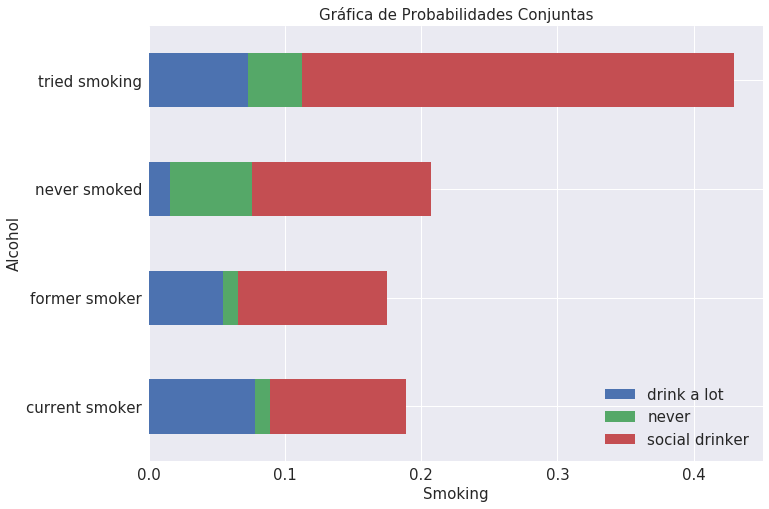

In [498]:
tabla = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'],normalize=True)
plot = tabla.plot(kind='barh',stacked=True,figsize=(11, 8), legend=True, fontsize=15)
plot.set_title("Gráfica de Probabilidades Conjuntas",fontsize=15)
plot.set_xlabel("Smoking",fontsize=15)
plot.set_ylabel("Alcohol",fontsize=15)
plot.legend(fontsize=15)
sns.despine()

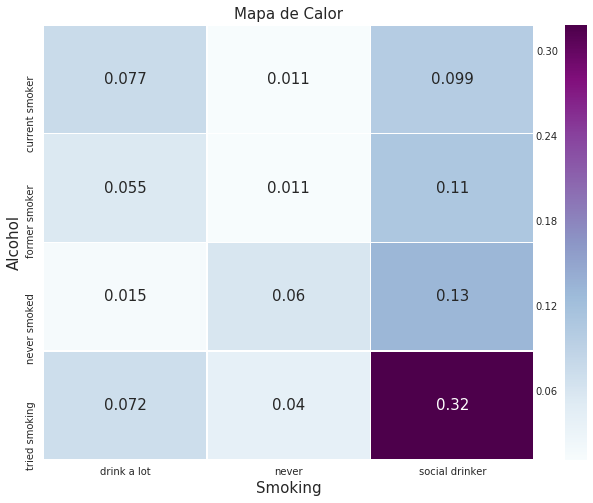

In [544]:
tabla_sin_margin = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'],normalize=True)
plt.figure(figsize=(11,8))
sns.heatmap(tabla_sin_margin, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="BuPu")
plt.xlabel("Smoking",fontsize=15)
plt.ylabel("Alcohol",fontsize=15)
plt.title("Mapa de Calor",fontsize=15)
sns.despine()

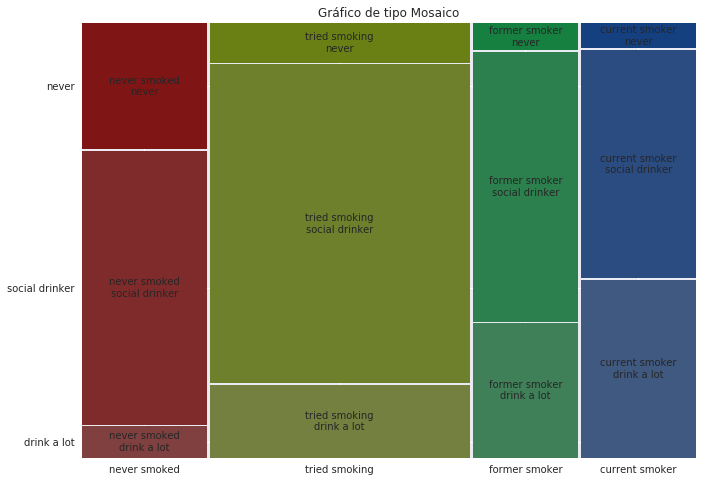

In [500]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(young, ['Smoking', 'Alcohol'], title='Gráfico de tipo Mosaico');

## Correlacion entre alcohol y tabaquismo
#### Falta

****

## Punto 3:
### Niveles de Tabaquismo y la prohición de fumar en los bares

#### En primer lugar, la información sobre tabaquismo la podemos encontrar en el dataset con el nombre de "Smoking", pero no así los datos sobre la presencia de bares. Sin embargo, podemos asociar la información de consumo de alcohol (que sí existe en el dataset) con la presencia de bares.

#### A continuación, analizamos los datos del tabaquismo (los cuales son datos del tipo "string"). Al ser datos "string" no podemos calcularle los estadísticos básicos sin aplicar algún tipo de procesamiento, que es justo lo que vamos a hacer.

#### Además, mostramos los datos sobre consumo de alcohol (que nos permite inferir la presencia de bares).

In [501]:
cuenta_fumadores_string = young.Smoking.value_counts().to_frame()
cuenta_alcohol_string = young.Alcohol.value_counts().to_frame()

display(cuenta_fumadores_string, cuenta_alcohol_string)

,Smoking
tried smoking,425
never smoked,206
current smoker,188
former smoker,173


,Alcohol
social drinker,652
drink a lot,220
never,123


#### Si deseamos calcularle estadísticos básicos a las categorías de consumo de alcohol y tabaquismo, debemos asignarle un valor númerico a cada una de las respuestas posibles. Para el caso del consumo de tabaco, hay 4 respuestas por lo tanto la escala numérica es de 1 al 4. En cambio, el consumo de alcohol tiene 3 respuestas posibles, por lo cual la escala será del 1 al 3.

1. Consumo de Tabaco:
    * Nunca fumó, le asigno un valor de $1$.
    * Alguna vez fumó, le asigno un valor de $2$.
    * Exfumador, le asigno un valor de $3$.
    * Actual fumador, le asigno un valor de $4$.
2. Consumo de Alcohol:
    * Nunca tomó alcohol, le asigno un valor de $1$.
    * Toma alcohol de manera social, le asigno un valor de $2$.
    * Toma mucho alcohol, le asigno un valor de $3$.

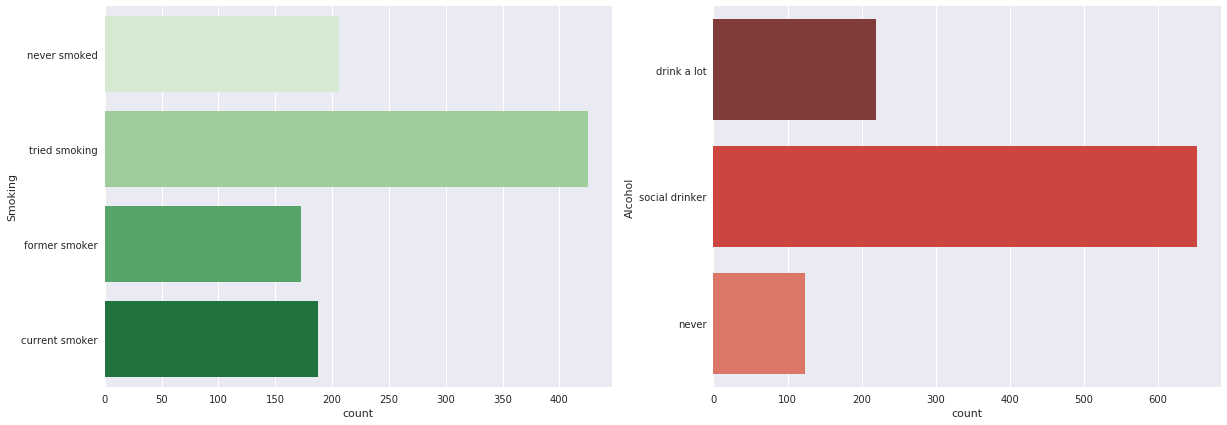

In [502]:
fumador = young.Smoking.replace("never smoked", 1) #Nunca fumó, le asigno un valor de 1
fumador = fumador.replace("tried smoking", 2) #Alguna vez fumó, le asigno un valor de 2
fumador = fumador.replace("former smoker", 3) #Exfumador, le asigno un valor de 3
fumador = fumador.replace("current smoker", 4) #Actual fumador, le asigno un valor de 4
#cuenta_fumadores_num = fumador.value_counts().to_frame()

alcohol = young.Alcohol.replace("never", 1) #Nunca tomó alcohol, le asigno un valor de 1
alcohol = alcohol.replace("social drinker", 2) #Toma alcohol de manera social, le asigno un valor de 2
alcohol = alcohol.replace("drink a lot", 3) #Toma mucho alcohol, le asigno un valor de 3
#cuenta_alcohol_num = alcohol.value_counts().to_frame()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
_ = sns.countplot(y="Smoking", data=young, palette="Greens", ax = ax[0])
_ = sns.countplot(y="Alcohol", data=young, palette="Reds_d", ax = ax[1])

#### A continuación vamos a ver los resultados si analizamos los dos datos categóricos "Smoking" y "Alcohol" en simultáneo y usamos la gráfica countplot() de seaborn:

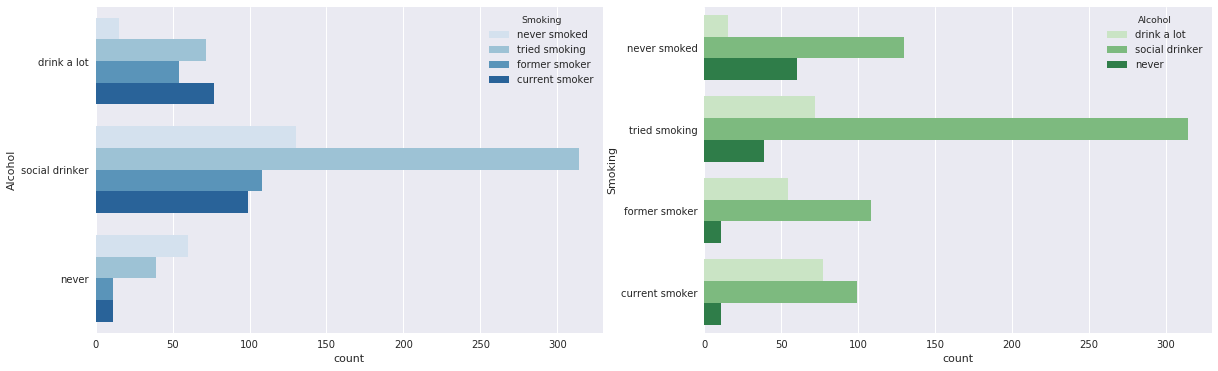

In [503]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
_ = sns.countplot(y="Alcohol", hue="Smoking", data=young, palette="Blues", ax = ax[0]);
_ = sns.countplot(y="Smoking", hue="Alcohol", data=young, palette="Greens", ax = ax[1]);

#### Se observa claramente que la mayoría de las personas ha probado el tabaco y es consumidor social de alcohol.

In [504]:
fumador.to_frame().describe()

,Smoking
count,992.000000
mean,2.345766
std,1.010741
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


#### Si vemos los resultados para el consumo de tabaco, podemos decir que la mayoría lo ha probado, ya que la media es de $2.34$, recordemos que $2$ corresponde a que "alguna vez fumó".

In [505]:
alcohol.to_frame().describe()

,Alcohol
count,995.000000
mean,2.097487
std,0.579273
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


#### De la misma forma, podemos decir que la mayoría son consumidores de alcohol de forma social, ya que la media es de $2.09$ (recordemos que $2$ corresponde a "toma alcohol de manera social").

### Análisis desde la perpectiva humana, de los datos de alcohol y tabaquismo:
#### Como pudimos ver anteriormente, en promedio, la gente alguna vez ha probado el tabaco y la mayoría es bebedor social. Entonces, 
* ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares?

#### Resultaría lógico que los niveles de tabaquismo disminuyan, debido a que como la mayoría ha probado el tabaco y es bebedor social, se puede inferir que los fumadores asisten a bares. Por lo tanto, si los fumadores asisten a los bares, el hecho de prohibir el consumo de tabaco produciría una disminución del tabaquismo.

* ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol? 

#### La cantidad de consumidores de alcohol disminuiría, debido a que como ya dijimos, en promedio las personas han probado el tabaco y es bebedor social, por lo tanto un porcentaje de los consumidores de alcohol es además fumador, entonces si menos fumadores toman alcohol, habrá menos cantidad de consumidores de alcohol.

#### Volvemos a mostrar el mapa de calor para los dos datos categóricos "Alcohol" y "Smoking", para poder comprobar que nuestras respuestas anteriores se corresponden con los datos reales:

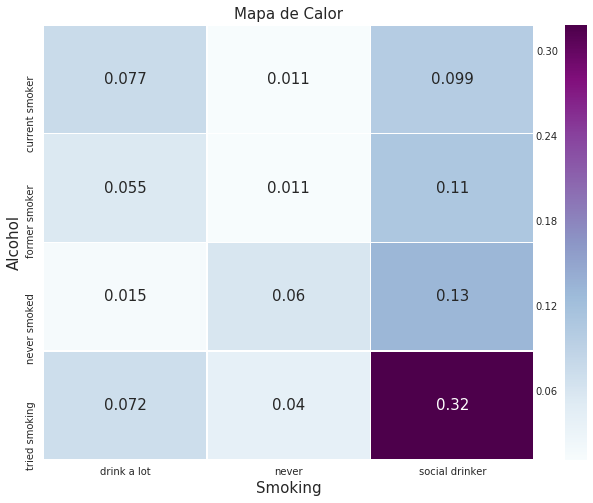

In [545]:
tabla_sin_margin = pd.crosstab(index=young['Smoking'],columns=young['Alcohol'],normalize=True)
plt.figure(figsize=(11,8))
sns.heatmap(tabla_sin_margin, annot=True, annot_kws={"size": 15}, linewidths=.5, cmap="BuPu")
plt.xlabel("Smoking",fontsize=15)
plt.ylabel("Alcohol",fontsize=15)
plt.title("Mapa de Calor",fontsize=15)
sns.despine()

****
****
****
# De aca se pueden sacar cosas extras!

## Exploratory analysis
### Missing values


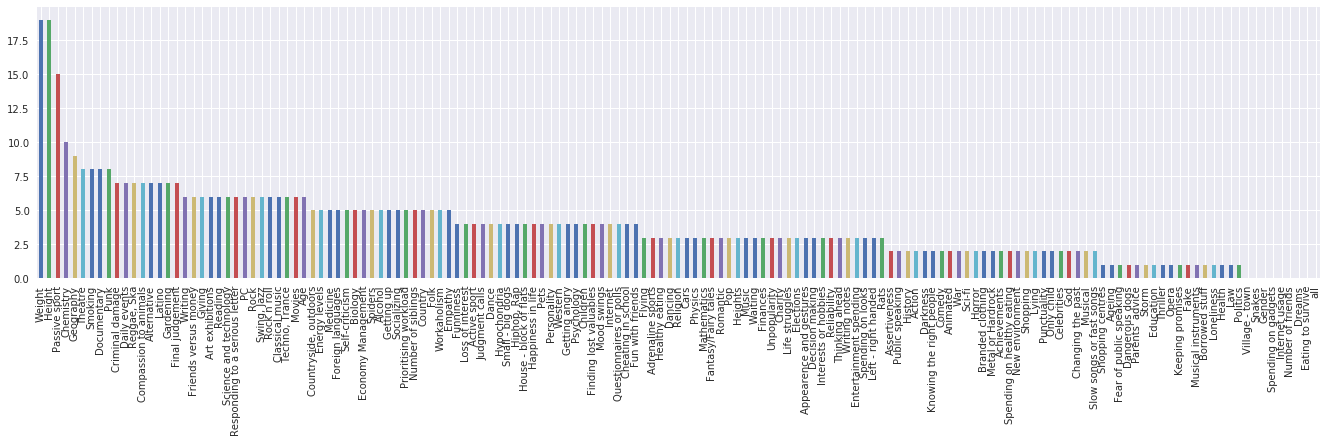

In [507]:
nulls = young.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

Missing values are always a pain because we do not know why people did not fill this field or maybe there was a post-processing error (how the data was transfered to the digital form) in the dataset. "In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey." Might be that participants of the survey, knowing that their data will be analyzed by their friends did not provide information like Age, Weight and Height because that are the main features according to which one can be identified.

In [508]:
print('Number of girls who omitted weight field: {:.0f}'.format(young[young['Gender']=='female']['Weight'].isnull().sum()))
print('Number of boys who omitted weight field: {:.0f}'.format(young[young['Gender']=='male']['Weight'].isnull().sum()))
print('Number of girls who omitted height field: {:.0f}'.format(young[young['Gender']=='female']['Height'].isnull().sum()))
print('Number of boys who omitted height field: {:.0f}'.format(young[young['Gender']=='male']['Height'].isnull().sum()))

Number of girls who omitted weight field: 13
Number of boys who omitted weight field: 6
Number of girls who omitted height field: 13
Number of boys who omitted height field: 6


Outch! Those numbers look weird. There is an amazing observation called Twyman's Law, which states: "Any piece of data or evidence that looks interesting or unusual is probably wrong!" Lets zoom on individuals of those NAs values.

In [509]:
omitted = young[(young['Weight'].isnull()) | young['Height'].isnull()]
print('Number of people with omitted weight or height: {:.0f}'.format(omitted.shape[0]))
nas = omitted.drop(['Weight', 'Height', 'Number of siblings', 'Age'], 1).isnull().sum().sum()
print('Number of fields that were omitted by people who did not fill Weight or Height: {:.0f}'.format(nas))

Number of people with omitted weight or height: 29
Number of fields that were omitted by people who did not fill Weight or Height: 16


Interestingly, that those who omitted height or weight or age or number of sibligs omitted obly 18 otehr fields, what supports the hypothesis regarding the age, weight and height identification. In further we will impute the missing values.

## Understanding our goal

As I mentioned, the focus will be on the analysis of urban and rural areas. So, we drop records that are missing in 'Village - town' column.

Btw as I always try to automatize/generalize things, this kernel can be used for analysis of other variables of interest. Just change 'var_of_interest', mapping and two fields in ML section.

In [510]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

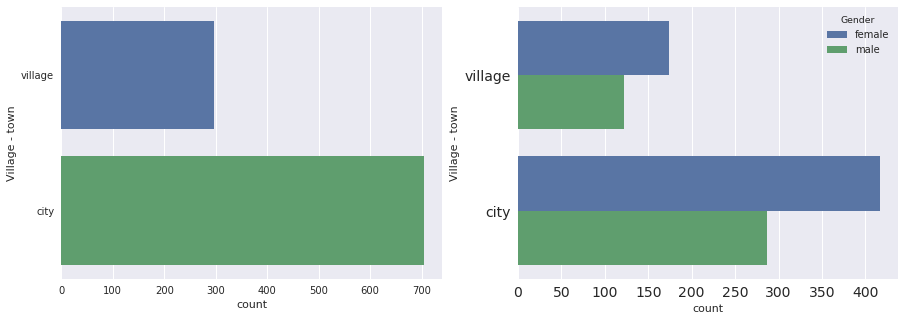

In [511]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.countplot(y = var_of_interest, data = young, ax = ax[0])
sns.countplot(y = var_of_interest, hue = 'Gender', data = young, ax = ax[1])
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)


The classes are highly imbalanced, there are twice so many people used to live in city then in the village. Imbalanced classes could be a problem for ML algorithms, we will discuss how to solve it but here are some ideas: oversampling, undersampling, (nice package to use is from imblearn.over_sampling.SMOTE)  and class weights defintions.

## Outliers

Lets have a look if there are any differences in height, weight or age between people from urban and rural areas

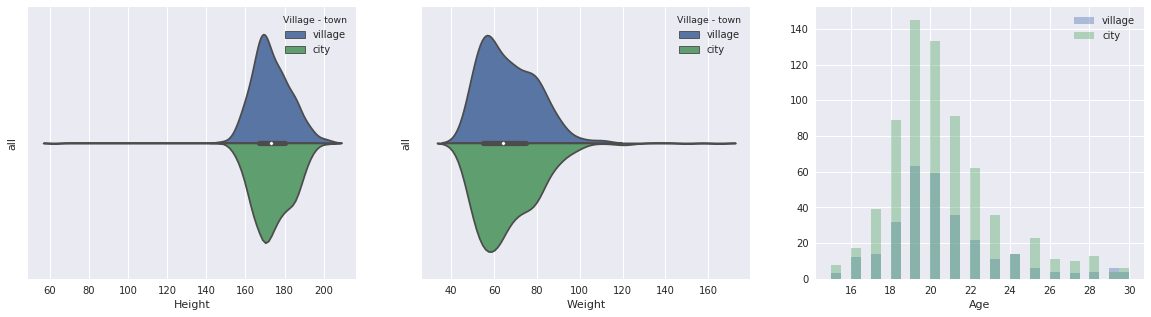

In [512]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0])
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1])

_ = sns.distplot(young[young[var_of_interest]=='village'].Age.dropna(),label = 'village', ax = ax[2], kde = False,bins = 30)
_ = sns.distplot(young[young[var_of_interest]=='city'].Age.dropna(),label = 'city', ax = ax[2], kde = False,bins = 30)
ax[2].legend();


As we see there are some outliers that disturb the visualisation.

In [513]:
display(young[young['Height']<70][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
display(young[young['Weight']>120][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
992,30.0,200.0,150.0,male,city


Also, keep in mind that participants could have mistaken the fields, so instead of writing their height in 'height' field, they could have written it in 'weight' field (165 kg could be actually intended to be 165 cm) . Or have just made a mistake while filling up the questionnaire (so 62 cm could have been 162 cm).
We will exclude two outliers because they might be just an error in the dataset and two guys who are weight more than 125 kg.

In [514]:
young.drop([676,885,992, 859], inplace = True)

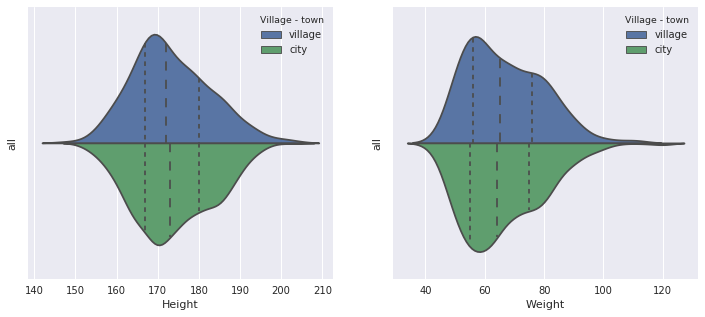

In [515]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data = young.dropna(subset=['Height'])
_ = sns.violinplot(x='Height', y="all", hue=var_of_interest, data=data, split=True, ax = ax[0], inner = 'quartile')
data = young.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y="all", hue=var_of_interest, data=data, split=True, ax = ax[1], inner = 'quartile')

Interestingly, there is a small secong hill in Height in city people around 185 cm. The horizontal lines are quartiles.

As TheTS mentioned in the comments, we could look at BMI of rural versus urban people. BMI is calculated as follows: weight/height^2. The hypothesis is that urban people will have a lower BMI as they might spend more times outdoors.

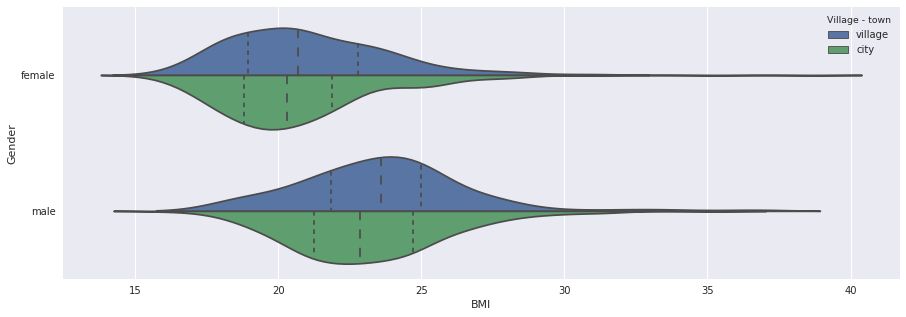

In [516]:
young['BMI'] = young['Weight']/((young['Height']/100)**2).round(1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data = young.dropna(subset=['BMI'])
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data, split=True, inner = 'quartile', ax = ax)


Surprisingly, the BMI of villagers is higher than of urban people. We can quickly check if it is significant. For that we will use a a two-sample one-sided t-test. 

In [517]:
import scipy.stats as stats
city_bmi = data[data[var_of_interest]=='city'].BMI
village_bmi  = data[data[var_of_interest]=='village'].BMI
t, p = stats.ttest_ind(village_bmi, city_bmi, axis=0, equal_var=False)
print(' t-stat = {t} \n p-value = {p}'.format(t=t,p=p/2))


 t-stat = 1.907870767972015 
 p-value = 0.028481112209586233


p-value is less than 0.05. There is indeed a significant difference in BMI.
BUT lets look at different age categories. We will have only two categories: under 20 and above 20. There are two main reasons for choosing this threshold:
1. Around the age of 20 people start to think about theit sport and food habits.
2. The question os the survey is forumlated as "I spent most of my childhood in a village or city". Most of 20 years old are still either living in the places where they spent their childhood or just have left them, meaning they were just shortly under its influence.

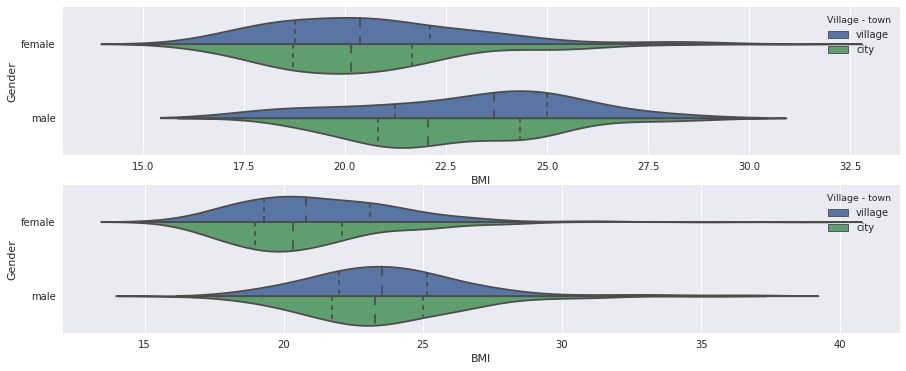

In [518]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
data_under = data[data['Age']<20]
data_above = data[data['Age']>=20]
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, split=True, 
                   inner = 'quartile', ax = ax[0], hue_order = ['village', 'city'])
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_above, split=True, 
                   inner = 'quartile', ax = ax[1], hue_order = ['village', 'city'])


What a surprise! The major drive of the difference is the BMI of males under 20 years old. Watson, we need to dig deeper! Lets have a look of how many individuals are causing this shift.

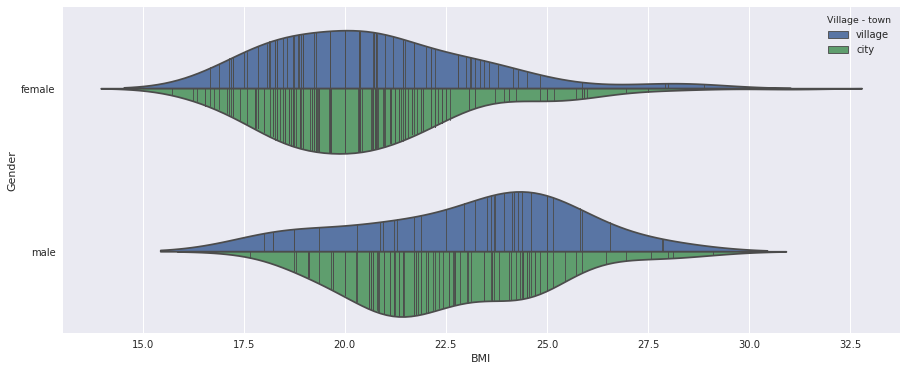

In [519]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
_ = sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, split=True, inner = 'stick', 
                   ax = ax, hue_order = ['village', 'city'])


My explanation for this inetresting fact is that in the cities young boys have much more sport possibilities and trainings than do have the rural boys. However, I would be happy to hear your reasoning :)

## Interesting differences

In this section we will analyze differences between the individuals based on the area of living.

## Correlation

Firstly, look at correlations between the charachteristics and the urban-rural area. Correlation describes the degree of relationship between two variables. However, it tells nothing about the causuality. Just a small example, the anti-violent gaming policies say that there is a correlation between time spent on playing violent computer games and a violent behaviour. In fact, we do not know if a the computer games make a person violent ora violent person would play more violent games.  

(Btw, I am a big fan of long-lasting code and functions that can be applied on different datasets :) ). So, the function correlation_plot can be applied on different datasets. The function produces two plots: one for numerical features, another for categorical.

In [520]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]
    

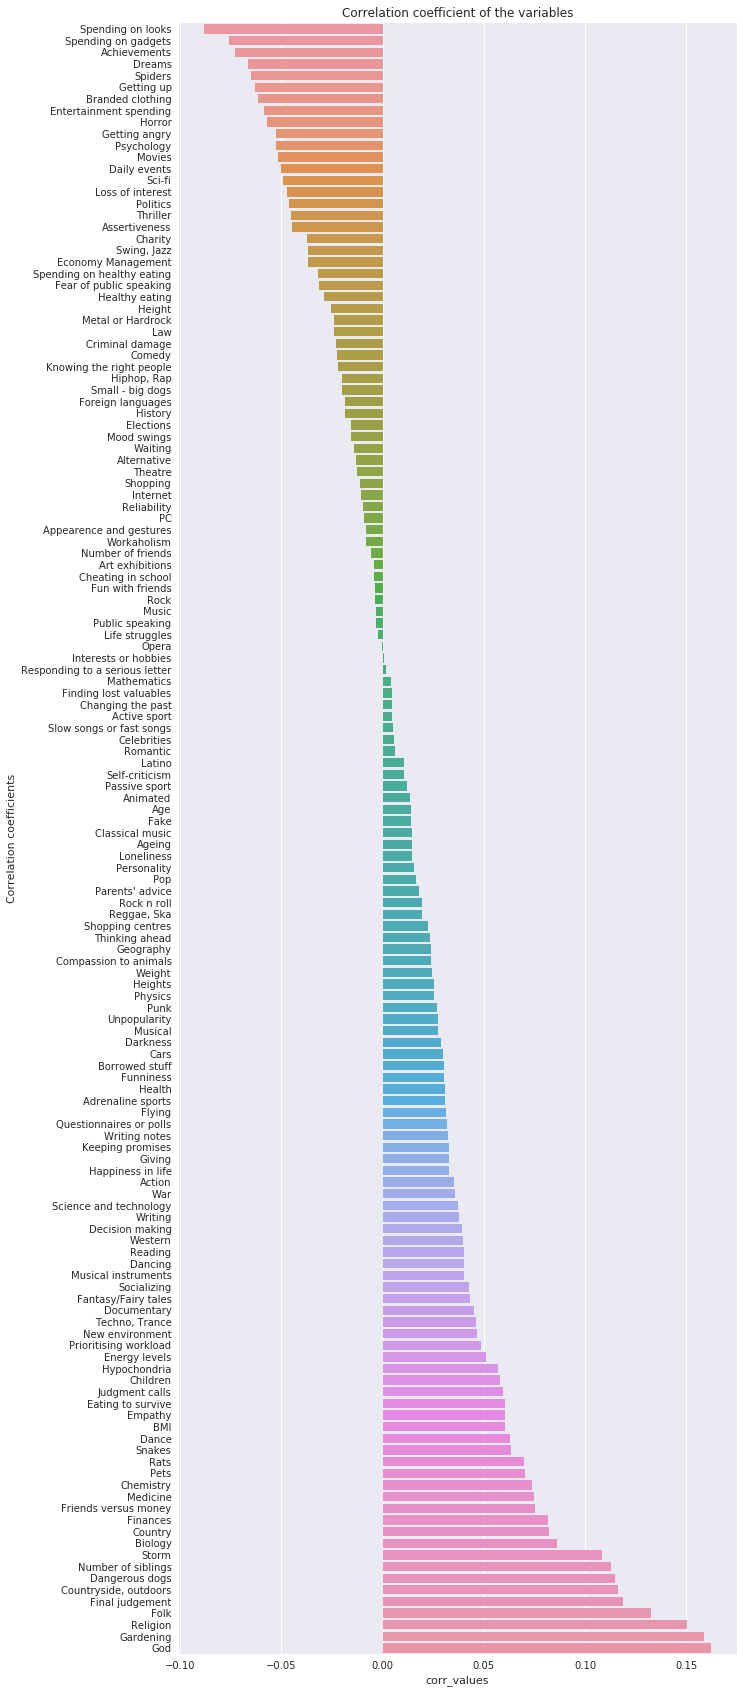

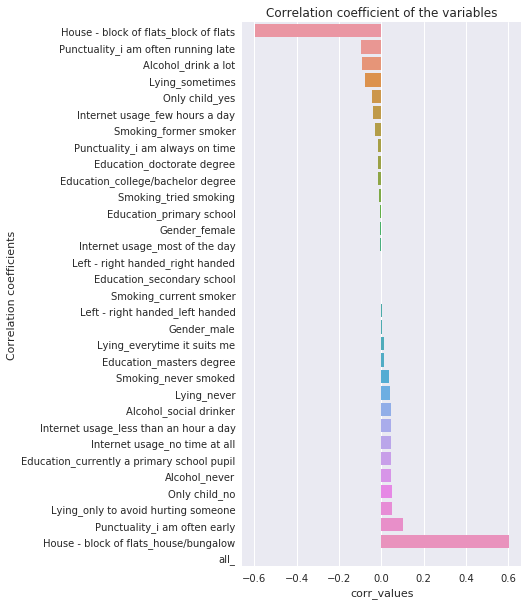

In [521]:
corrs_area = correlation_plot(var_of_interest, young, mapping)

The strongest correlations that we have are coming fro the house type and it is quite logical because people in the village would live most of the time in the houses. Other correlations that are not that strong are the associations with God and Spending on looks. We will dig into it.



In [522]:
#The strongest correlations that we have are  
corr_num = corrs_area[0]
corr_cats = corrs_area[1]
display(corr_num[corr_num.corr_values == max(corr_num.corr_values)])
display(corr_num[corr_num.corr_values == min(corr_num.corr_values)])
display(corr_cats[corr_cats.corr_values == max(corr_cats.corr_values)])
display(corr_cats[corr_cats.corr_values == min(corr_cats.corr_values)])

,corr_values,features
101,0.162336,God


,corr_values,features
132,-0.088249,Spending on looks


,corr_values,features
31,0.602161,House - block of flats_house/bungalow


,corr_values,features
30,-0.595939,House - block of flats_block of flats


## Characteristic differences

I have picked the features that were different among people from urban and rural areas. The plot of all features can be found at the end of this notebook.

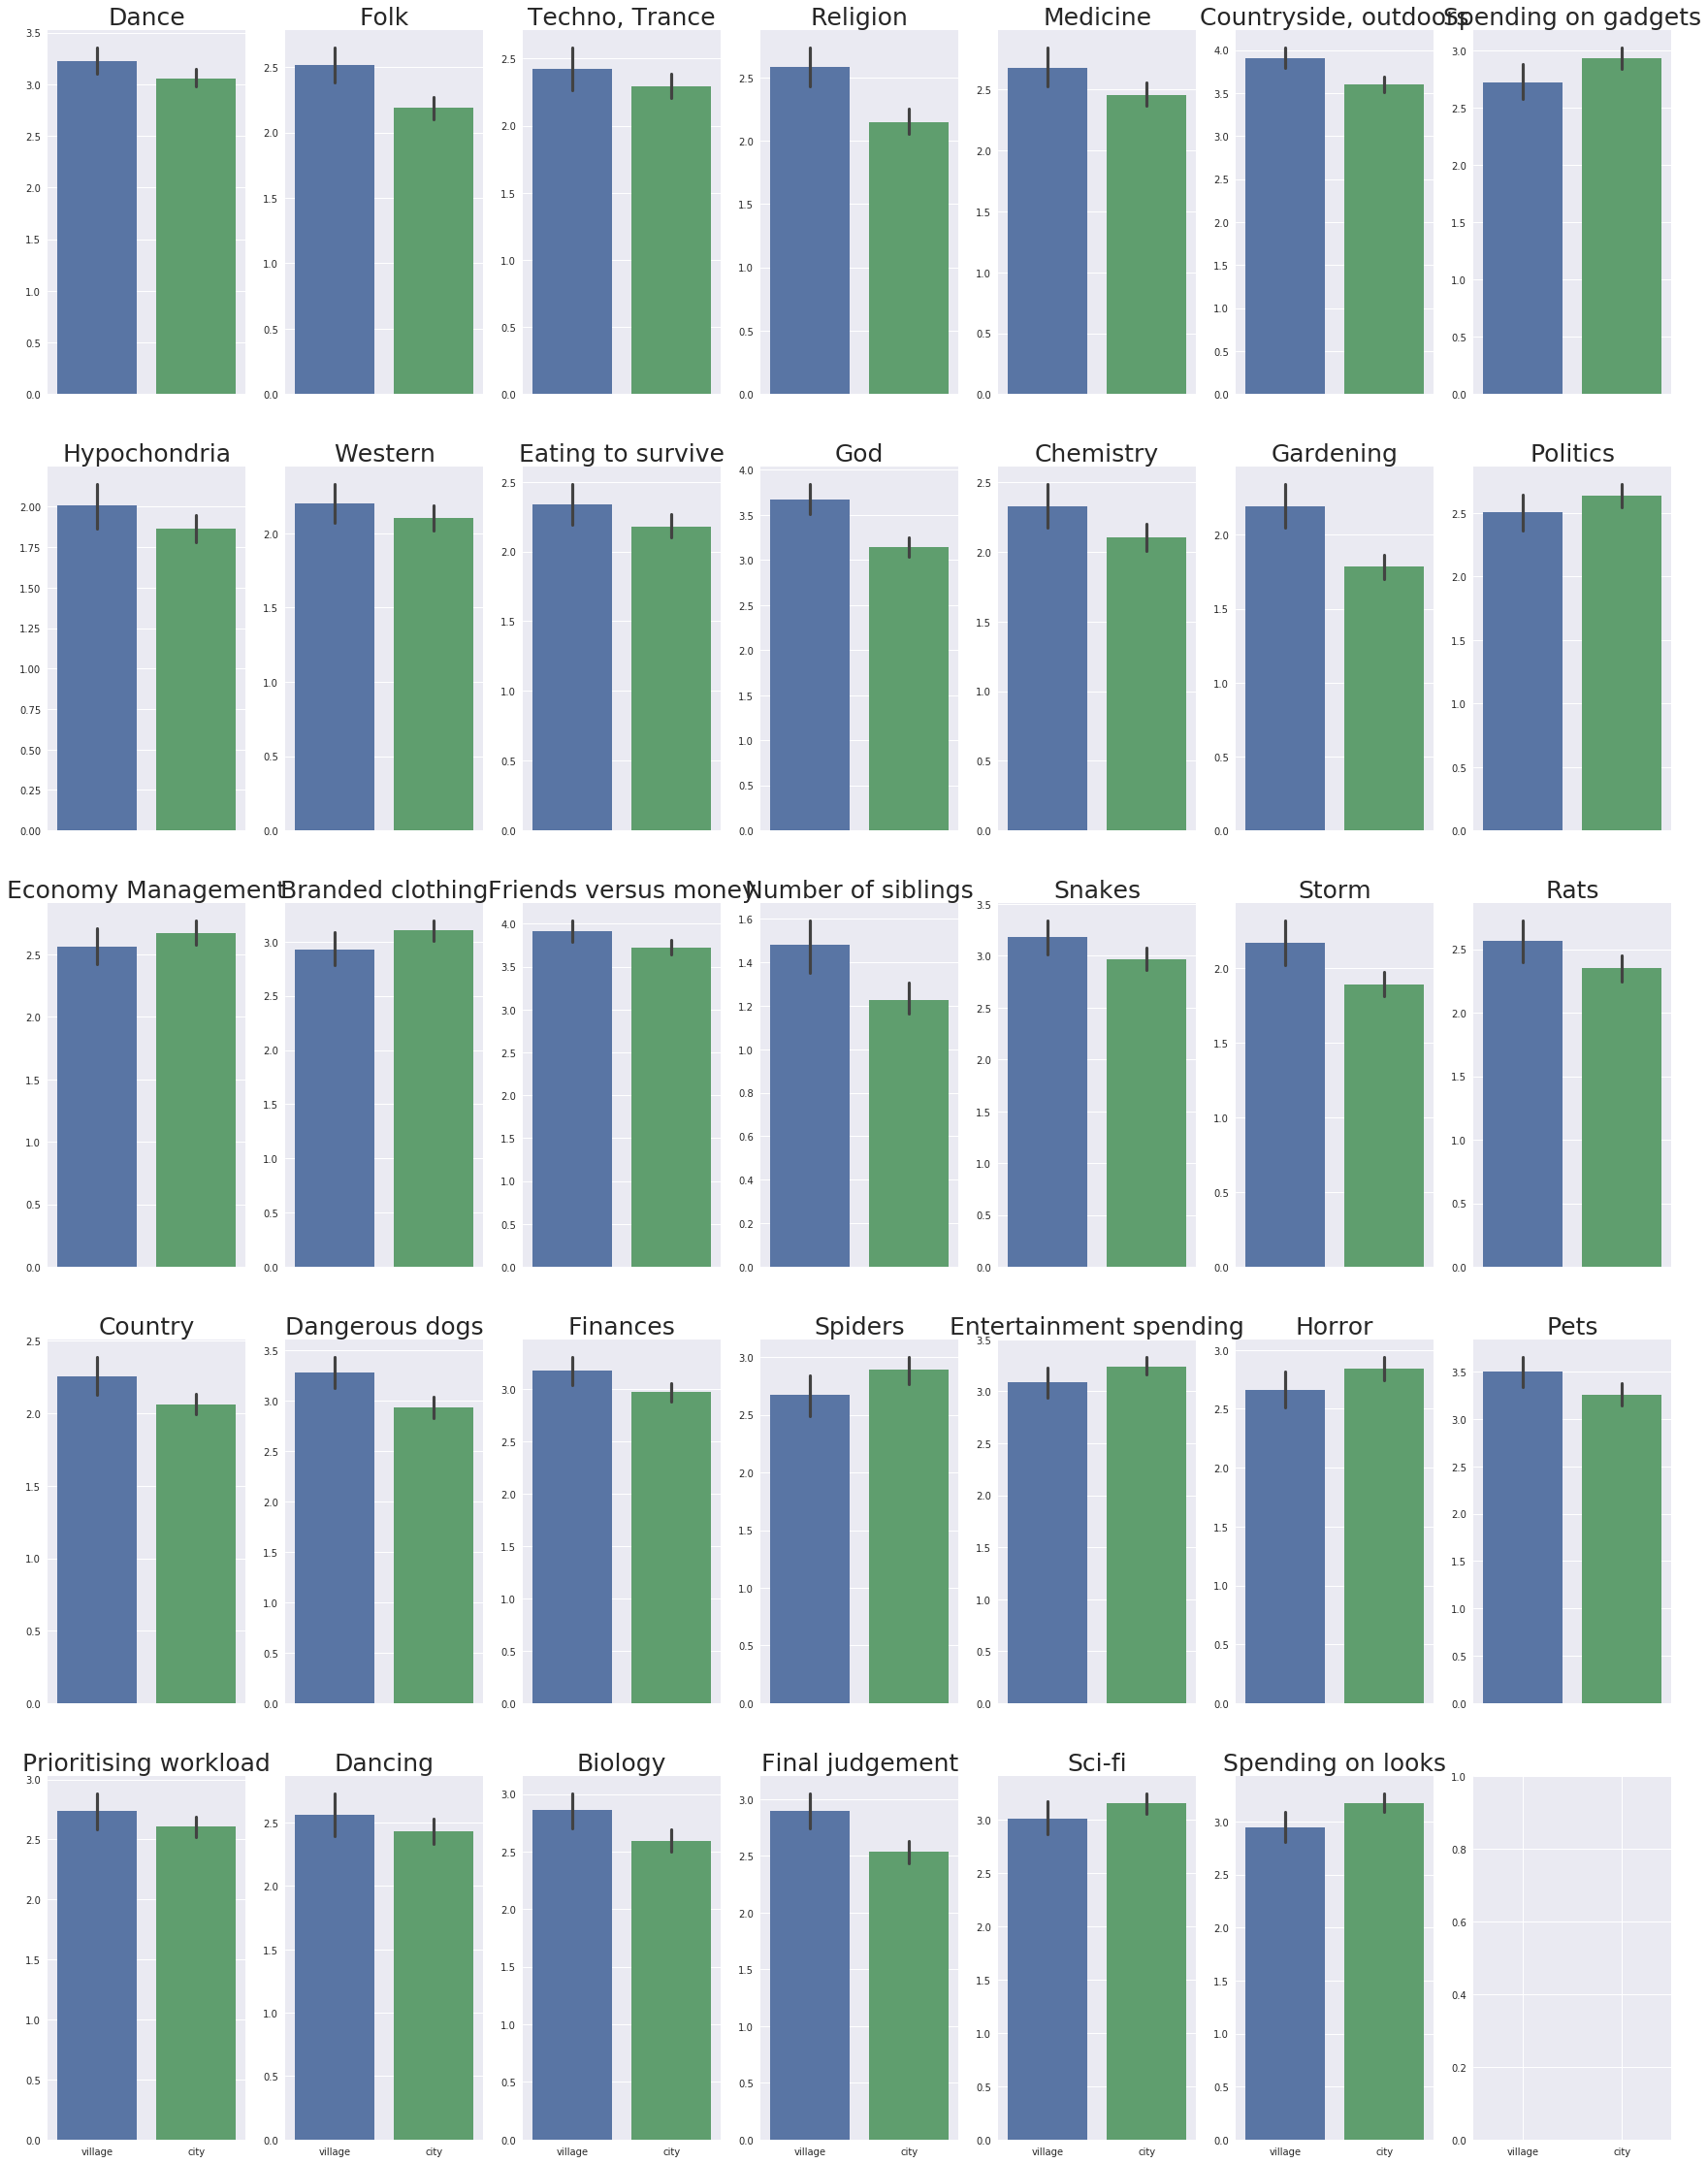

In [523]:
good_columns = ['Dance', 'Folk', 'Techno, Trance','Religion', 'Medicine', 'Countryside, outdoors']
good_columns = good_columns + ['Spending on gadgets','Hypochondria','Western', 'Eating to survive', 'God', 'Chemistry', 'Gardening']
good_columns = good_columns + ['Politics','Economy Management','Branded clothing','Friends versus money','Number of siblings', 'Snakes']
good_columns = good_columns + ['Storm', 'Rats', 'Country', 'Dangerous dogs', 'Finances', 'Spiders', 'Entertainment spending']
good_columns = good_columns + ['Horror', 'Pets', 'Prioritising workload', 'Dancing', 'Biology', 'Final judgement', 'Sci-fi', 'Spending on looks']
fig, ax = plt.subplots(nrows = 5, ncols = 7 ,figsize=(30,40), sharex=True)
start = 0
for j in range(5):
    for i in range(7):
        if start == len(good_columns):
            break
        sns.barplot(y=good_columns[start], x=var_of_interest, data=young, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(good_columns[start], fontsize=25)
        start += 1


There are several interesting observations:

People from rural area are more into folk music; are more likely to spend time outdoors gardening; also there are more interested in biology, medicine and chemistry. It is quite logical as people in villages are often more close to the nature and therefore would spend time outdoors exploring. Also, the phobias of snakes, rats, dangerous dogs and storm are well-marked in people living in rural areas as they could have had a direct contact to it and know about the circumstances. On the other hand, they are less afraid of the spiders which again can be explained due to the fact that they were more exposed to the nature. Village-livers are more hypochondriac than city-livers which can be explained that there are less hospitals and doctors in villages.

What is a bit striking is that peopel from rural areas are more religios (Religion and God) than in the city. Additionaly, they are proned to "Final judgement" aka "I believe that bad people will suffer one day and good people will be rewarded". It can also have something to do with the stronger belief in God.

City-livers would spend more money on looks, entertainment and branded clothing as norally cities offer much more possibilitie to go shopping and have more entertainment facilities than the villages. Also, they would spend more time on gadgets.

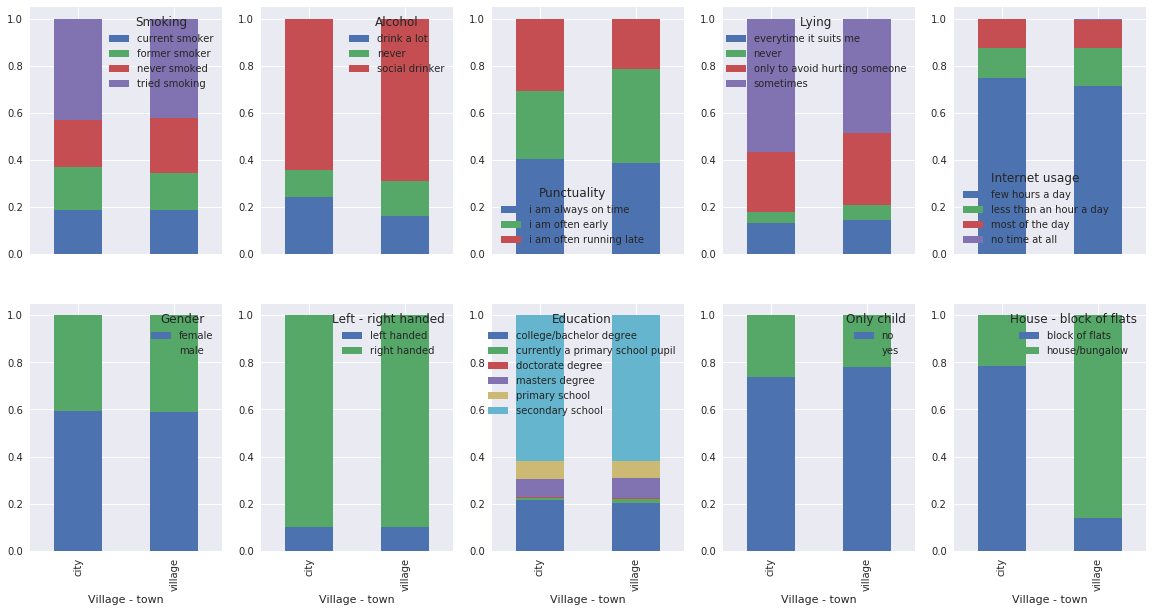

In [524]:
features_cats = [col for col in young.columns if young[col].dtype=='object']
features_cats.remove(var_of_interest)
fig, ax = plt.subplots(nrows = 2, ncols = 5,figsize=(20,10), sharex=True)
start = 0
for j in range(2):
    for i in range(5):
        tab = pd.crosstab(young[var_of_interest], young[features_cats[start]])
        tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
        tab_prop.plot(kind="bar", stacked=True, ax=ax[j,i] )
        start += 1

In the categorial features only one thing catches the eye, namelly, that village-livers mst of the time live in the houses comparing to the city livers who most live in the flat. That is also self-explanatory.

## Multicollinearity

Apart from outliers and missing values, multicollinearity is another common issue. Some ML algorithms like Random Forest do not suffer from multicollinearity, whereas linear regression could have problems with it. 

So, it would be quite exciting to look which characteristics are correlated in our data set.

In [525]:
corr = young.corr()
# code: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os.head(10))
display(os.tail(10))

Weight               BMI                 0.849540
Height               Weight              0.737368
Biology              Medicine            0.716125
                     Chemistry           0.687339
Fantasy/Fairy tales  Animated            0.677006
Shopping             Shopping centres    0.650660
Chemistry            Medicine            0.628382
Classical music      Opera               0.596417
Mathematics          Physics             0.590115
Snakes               Rats                0.573764
dtype: float64

Reading            Cars                -0.311798
Action             Life struggles      -0.312013
Cars               Life struggles      -0.312384
Romantic           Height              -0.325854
Loneliness         Energy levels       -0.347057
Changing the past  Happiness in life   -0.349297
Dangerous dogs     Small - big dogs    -0.371940
Life struggles     Weight              -0.381817
                   Height              -0.398038
Loneliness         Happiness in life   -0.437772
dtype: float64

The most correlated features are Height and Weight, what again self-explanaroty. People who are interested in Biology are also interested in Medicne and Chemistry. The same for Fantasy/Fairy tales and  Animated movies.

You might ask why there is a negative correlation between Life struggles, Weight and Heigt. I will disclose it a the end ;) and will confront once again with the definition of correlation.

Meanwhile lets have a look on the correlations amoung out good features.

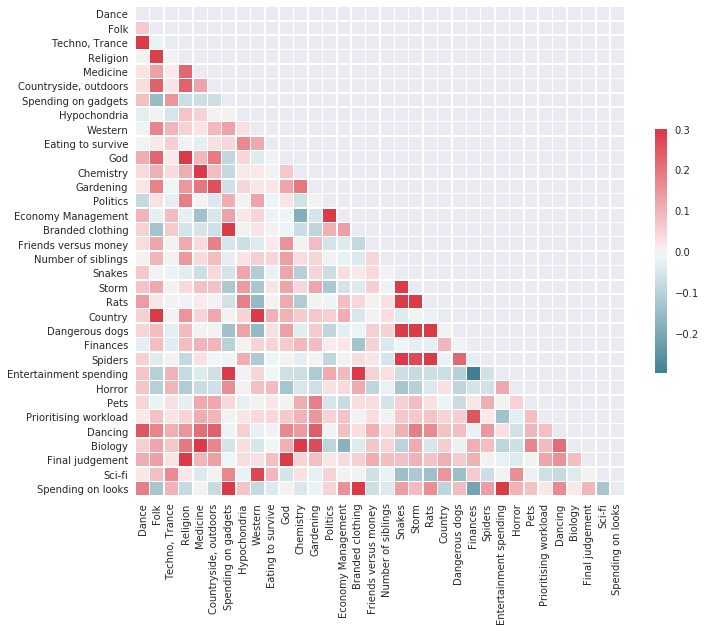

In [526]:
corr = young[good_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

There is indeed a correlation between Final Judgement and God! Religios people tend to believe more that the bas ones will suffer.

In [527]:
print (os['Final judgement'][0:2])

God        0.491789
Charity    0.165866
dtype: float64


In [528]:
print (os['Religion'][0:2])

God                0.511151
Final judgement    0.295633
dtype: float64


The ones who spend money on entertainment, also spend money on looks and gadgets.

In [529]:
print (os['Entertainment spending'])

Spending on looks             0.407390
Spending on gadgets           0.340825
Height                        0.160493
Spending on healthy eating    0.143712
Weight                        0.127278
BMI                           0.066636
Number of siblings            0.030676
Age                          -0.044748
dtype: float64


Lets exclude of the element from the correlation pair once the correlation is more than 0.5

In [530]:
corr = young.corr()
os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os[abs(os)>0.5])
drop_colinera_cols = os[abs(os)>0.5].reset_index()['level_1']

Weight                   BMI                  0.849540
Height                   Weight               0.737368
Biology                  Medicine             0.716125
                         Chemistry            0.687339
Fantasy/Fairy tales      Animated             0.677006
Shopping                 Shopping centres     0.650660
Chemistry                Medicine             0.628382
Classical music          Opera                0.596417
Mathematics              Physics              0.590115
Snakes                   Rats                 0.573764
Metal or Hardrock        Punk                 0.548399
Art exhibitions          Theatre              0.543663
Rock                     Metal or Hardrock    0.529633
Shopping                 Spending on looks    0.512647
Religion                 God                  0.511151
Rock                     Punk                 0.509282
Horror                   Thriller             0.505435
Storm                    Darkness             0.505401
Fear of pu

### Preparing the dataset for ML

In [531]:
clean_data = young.dropna(subset=[var_of_interest])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
features_cats = [col for col in clean_data.columns if clean_data[col].dtype=='object']

features_int = list(set(features_int) - set(drop_colinera_cols))
print ('Number of features {:.0f}'.format(len(features_int)))

Number of features 123


We will impute missing values with the mean, althought there are some better solutions to do it, like imputing Height and Weight according to the Gender or taking randomly a value in the range [mean - std, mean + std]

In [532]:
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
#X_cats = clean_data[features_cats].drop(var_of_interest, 1)
#X_cats = X_cats.drop('House - block of flats', 1)
#X_cats = pd.get_dummies(X_cats)
#print(X.shape)
#print(X_cats.shape)

In [533]:
Y = clean_data[var_of_interest]
for key, val in mapping[var_of_interest].items():
    Y.replace(key,val, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

It is also a good idea to have a look on the distrubtion once me imputed the values to be sure that we did not disrupt it.

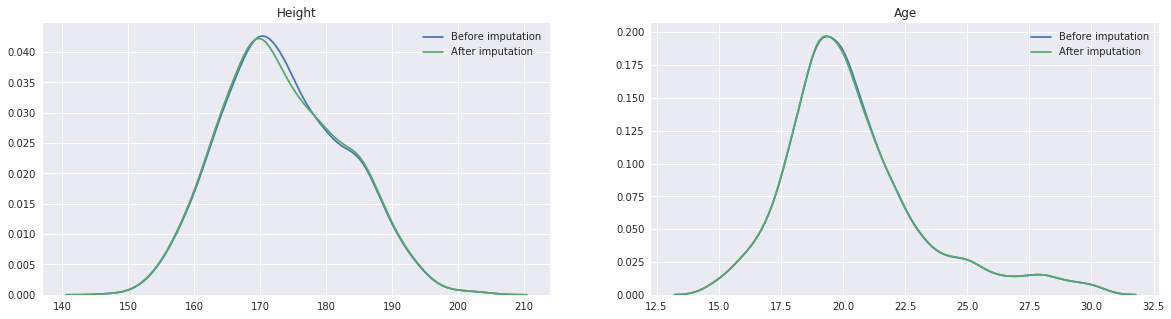

In [534]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
#fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

_ = sns.kdeplot(X.Height,label = 'Before imputation', ax = ax[0])
_ = sns.kdeplot(clean_data.Height, label = 'After imputation', ax = ax[0])
_ = ax[0].set_title('Height')

_ = sns.kdeplot(X.Age,label = 'Before imputation', ax = ax[1])
_ = sns.kdeplot(clean_data.Age, label = 'After imputation', ax = ax[1])
_ = ax[1].set_title('Age')

#sns.kdeplot(X.Weight,label = 'Before imputation', ax = ax[2])
#sns.kdeplot(clean_data.Weight, label = 'After imputation' , ax = ax[2])
#ax[2].set_title('Weight')

## Machine Learning

We will standardize variables to be sure that everything is on whie scale as it plays quite an important role in regularization as we will apply logistic regression. The goal is to find variables that have more effect on the dependent variable (aka rural or urban liver).

(One also could use another metric to optimize like f1 but in fact accuracy metrix performed somehow better on this dataset regarding the f1 and accuracy score on test set.)

In [535]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [536]:

# gridsearch for parameter tuning
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
KF = KFold(len(x_train), n_folds=5)
param_grid = {'C':[.001,.01,.03,.1,.3,1,3,10]}
grsearch = GridSearchCV(clr, param_grid=param_grid, cv=KF, scoring = 'f1')
grsearch.fit(x_train, y_train)
print(grsearch.best_params_)

# fitting logistic regression and evaluating
clr = LogisticRegression(C=grsearch.best_params_['C'])
clr.fit(x_train, y_train)

print('Average accuracy score on CV set: {:.2f}'.format(np.mean(cross_val_score(clr, x_train, y_train, cv=KF))))
print('Average f1 on CV set: {:.2f}'.format(np.mean(cross_val_score(clr, x_train, y_train, cv=KF, scoring = 'f1'))))
print('')
print('Accuracy score on test set is: {:.2f}'.format(clr.score(x_test, y_test)))
recall = recall_score(y_test, clr.predict(x_test))
print ('Recall on test: {:.2f}'.format(recall))
precision = precision_score(y_test, clr.predict(x_test))
print ('Presicion on test: {:.2f}'.format(precision))
print ('F1 score on test: {:.2f}'.format((2*recall*precision /(recall + precision))))


{'C': 0.001}
Average accuracy score on CV set: 0.65
Average f1 on CV set: 0.40

Accuracy score on test set is: 0.69
Recall on test: 0.40
Presicion on test: 0.50
F1 score on test: 0.45



Lets look at the impact of all features on our rural-village liver classification. And no worries, we will zoom in.

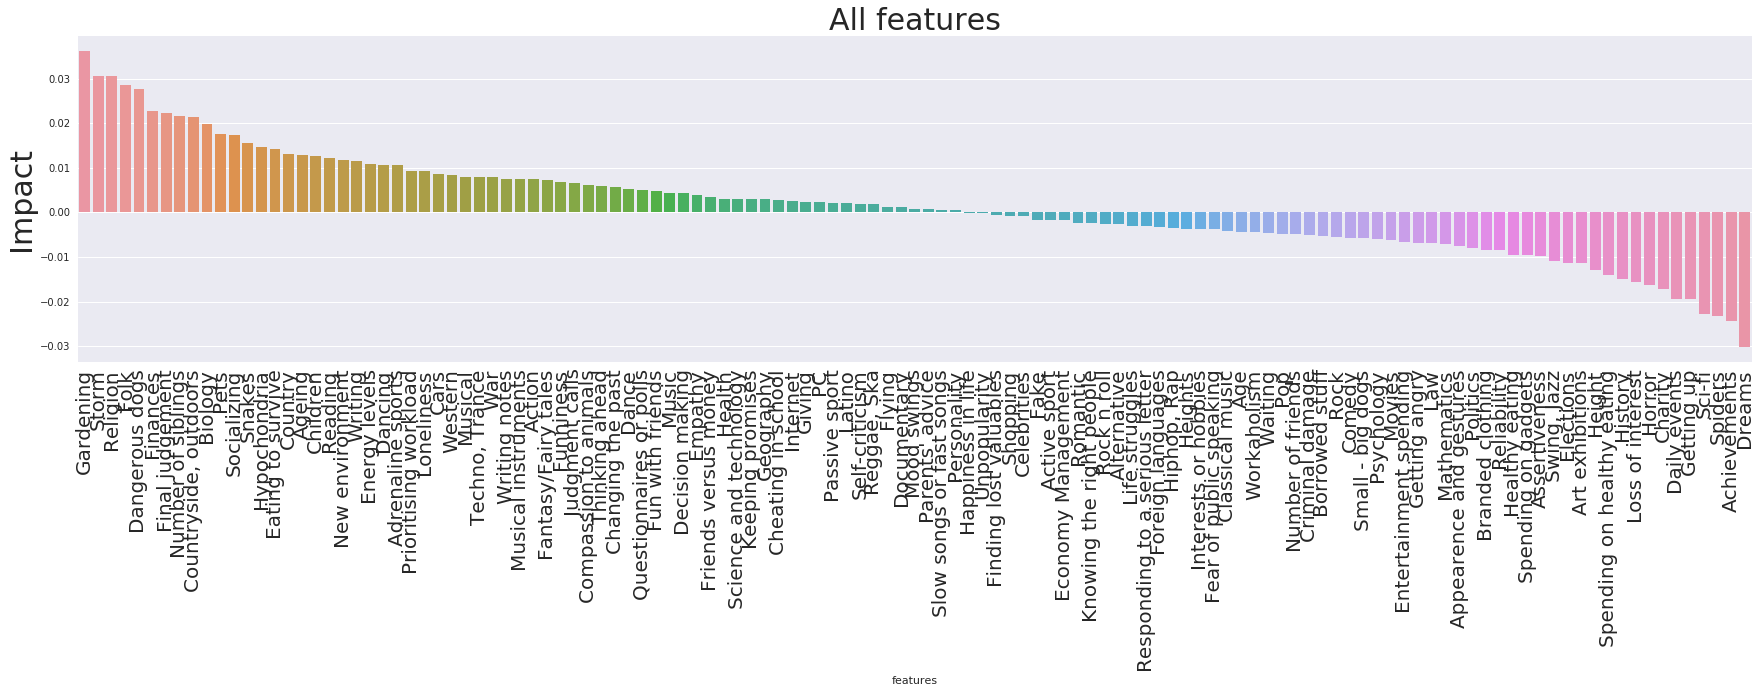

In [537]:
feat_coeff = pd.DataFrame({'features': X.columns,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

fig, ax1 = plt.subplots(1,1, figsize=(30,6))
_ = sns.barplot(x=feat_coeff.features, y=feat_coeff.impacts, ax=ax1)
_ = ax1.set_title('All features', size=30)
_ = ax1.set_xticklabels(labels=feat_coeff.features, size=20, rotation=90)
_ = ax1.set_ylabel('Impact', size=30)

Zooming on only top 12 features based on their coefficients:

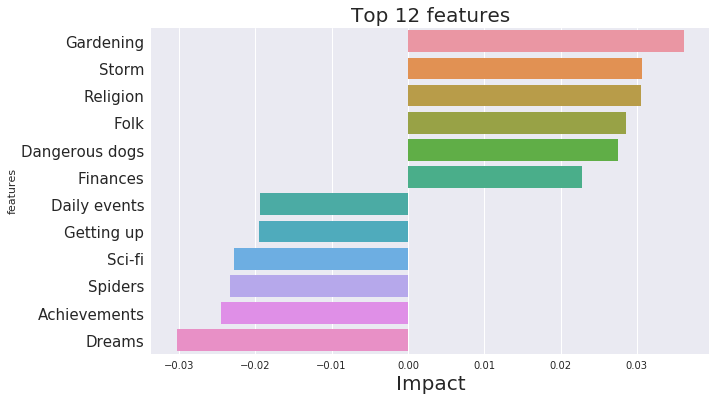

In [538]:
top10 = pd.concat([feat_coeff.head(6),feat_coeff.tail(6)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
_ = sns.barplot(y=top10.features, x=top10.impacts, ax=ax1)
_ = ax1.set_title('Top 12 features', size=20)
_ = ax1.set_yticklabels(labels=top10.features, size=15)
_ = ax1.set_xlabel('Impact', size=20)

You can interpret it as : For every unit change in gardening (so, you thought ok, it is actually 5 not 4) the log odds of you having lived in city is decreased by 0.156. 

It will get a bit simplier if we exponetiate the coefficients. The interpretation would be then: For every unit change in gardening the odds of you having lived in city is decreased by a factor exp(-0.156) = 0.8555592 (or by 85%).  

Disclaimer: As we have quite lots of features and only 1K samples, it would be good to do somekind of feature selection as linear models tend to suffer from non-informative features. (see Max Kuhn "Applied Predictive Modeling", Feature Selection)

**Insights:**
* Gardening, fear of dogs and storm, as well as religion decrease the odds of having lived in the city. Rural area livers are more exposed to gardening and might have more experience with dangerous dogs. As well as storm might have a more devastating effect on the village than on a city. People in the village are also typically a bit more religious than in the city.
* The fear of spiders increase the odds of living in the city. It is also intuitive as city livers are less used to spiders than the village livers. 

Sci-fi genre of movies might, healthy eating and fear of public speaking as well as getting angry are a bit speculative. Do urban livers get angry faster also why do they prefer Sci-fi more?

## The dessert: negative correlation between Life struggles, Weight and Heigt

In [539]:
display(os.tail(3))

Life struggles  Weight              -0.381817
                Height              -0.398038
Loneliness      Happiness in life   -0.437772
dtype: float64

To understand why there is a negative correlation between life struggles, weight and height I will change the objectives. Now, we want to analyze the data based on the gender difference. So, lets plot correlation of each variable against the gender.

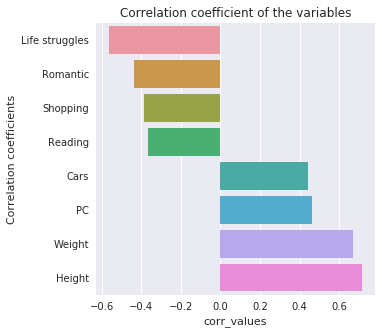

In [540]:
corrs_dfs_gender = correlation_plot('Gender', young[['Life struggles', 'Romantic', 'Shopping', 'Reading', 'Weight', 'Height', 'PC', 'Cars', 'Gender']], {'Gender': {'female': 0, 'male': 1}}, figsize=(5,5))

And a regression that will help us to get more insights.

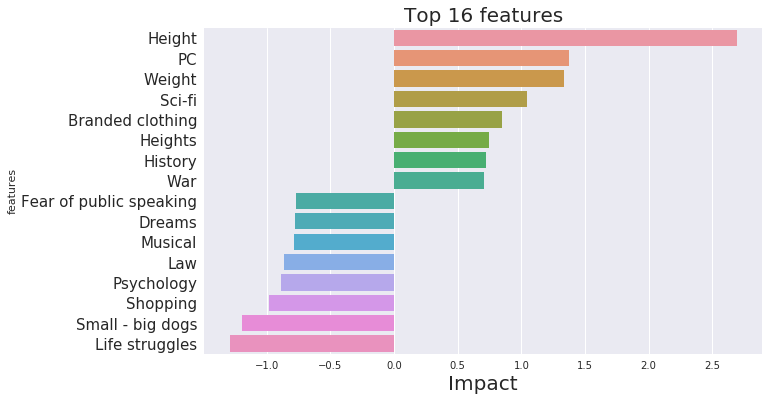

In [541]:
clean_data = young.dropna(subset=['Gender'])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
Y = clean_data['Gender']
Y.replace('female',0, inplace = True)
Y.replace('male',1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

clr = LogisticRegression()
clr.fit(X, Y)
feat_coeff = pd.DataFrame({'features': features_int,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

top10 = pd.concat([feat_coeff.head(8),feat_coeff.tail(8)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
_ = sns.barplot(y=top10.features, x=top10.impacts, ax=ax1)
_ = ax1.set_title('Top 16 features', size=20)
_ = ax1.set_yticklabels(labels=top10.features, size=15)
_ = ax1.set_xlabel('Impact', size=20)

Found it! If you are proned to "I cry when I feel down or things don't go the right way." you are probably a woman :). But if you are tall, or weight a lot or like to "PC Software, Hardware" then you are probably a man.

Negative correlation between Life struggles and Height/Weight was due to the female and male separation. Meaning, the taller you are (you are probably a male then) the less life struggles you have (which points to a woman)

**********************
**I will be happy to hear remarks or comments. **


**Have fun with the data!**
***********************

### Additional plots

Plots for all variables in the objective.

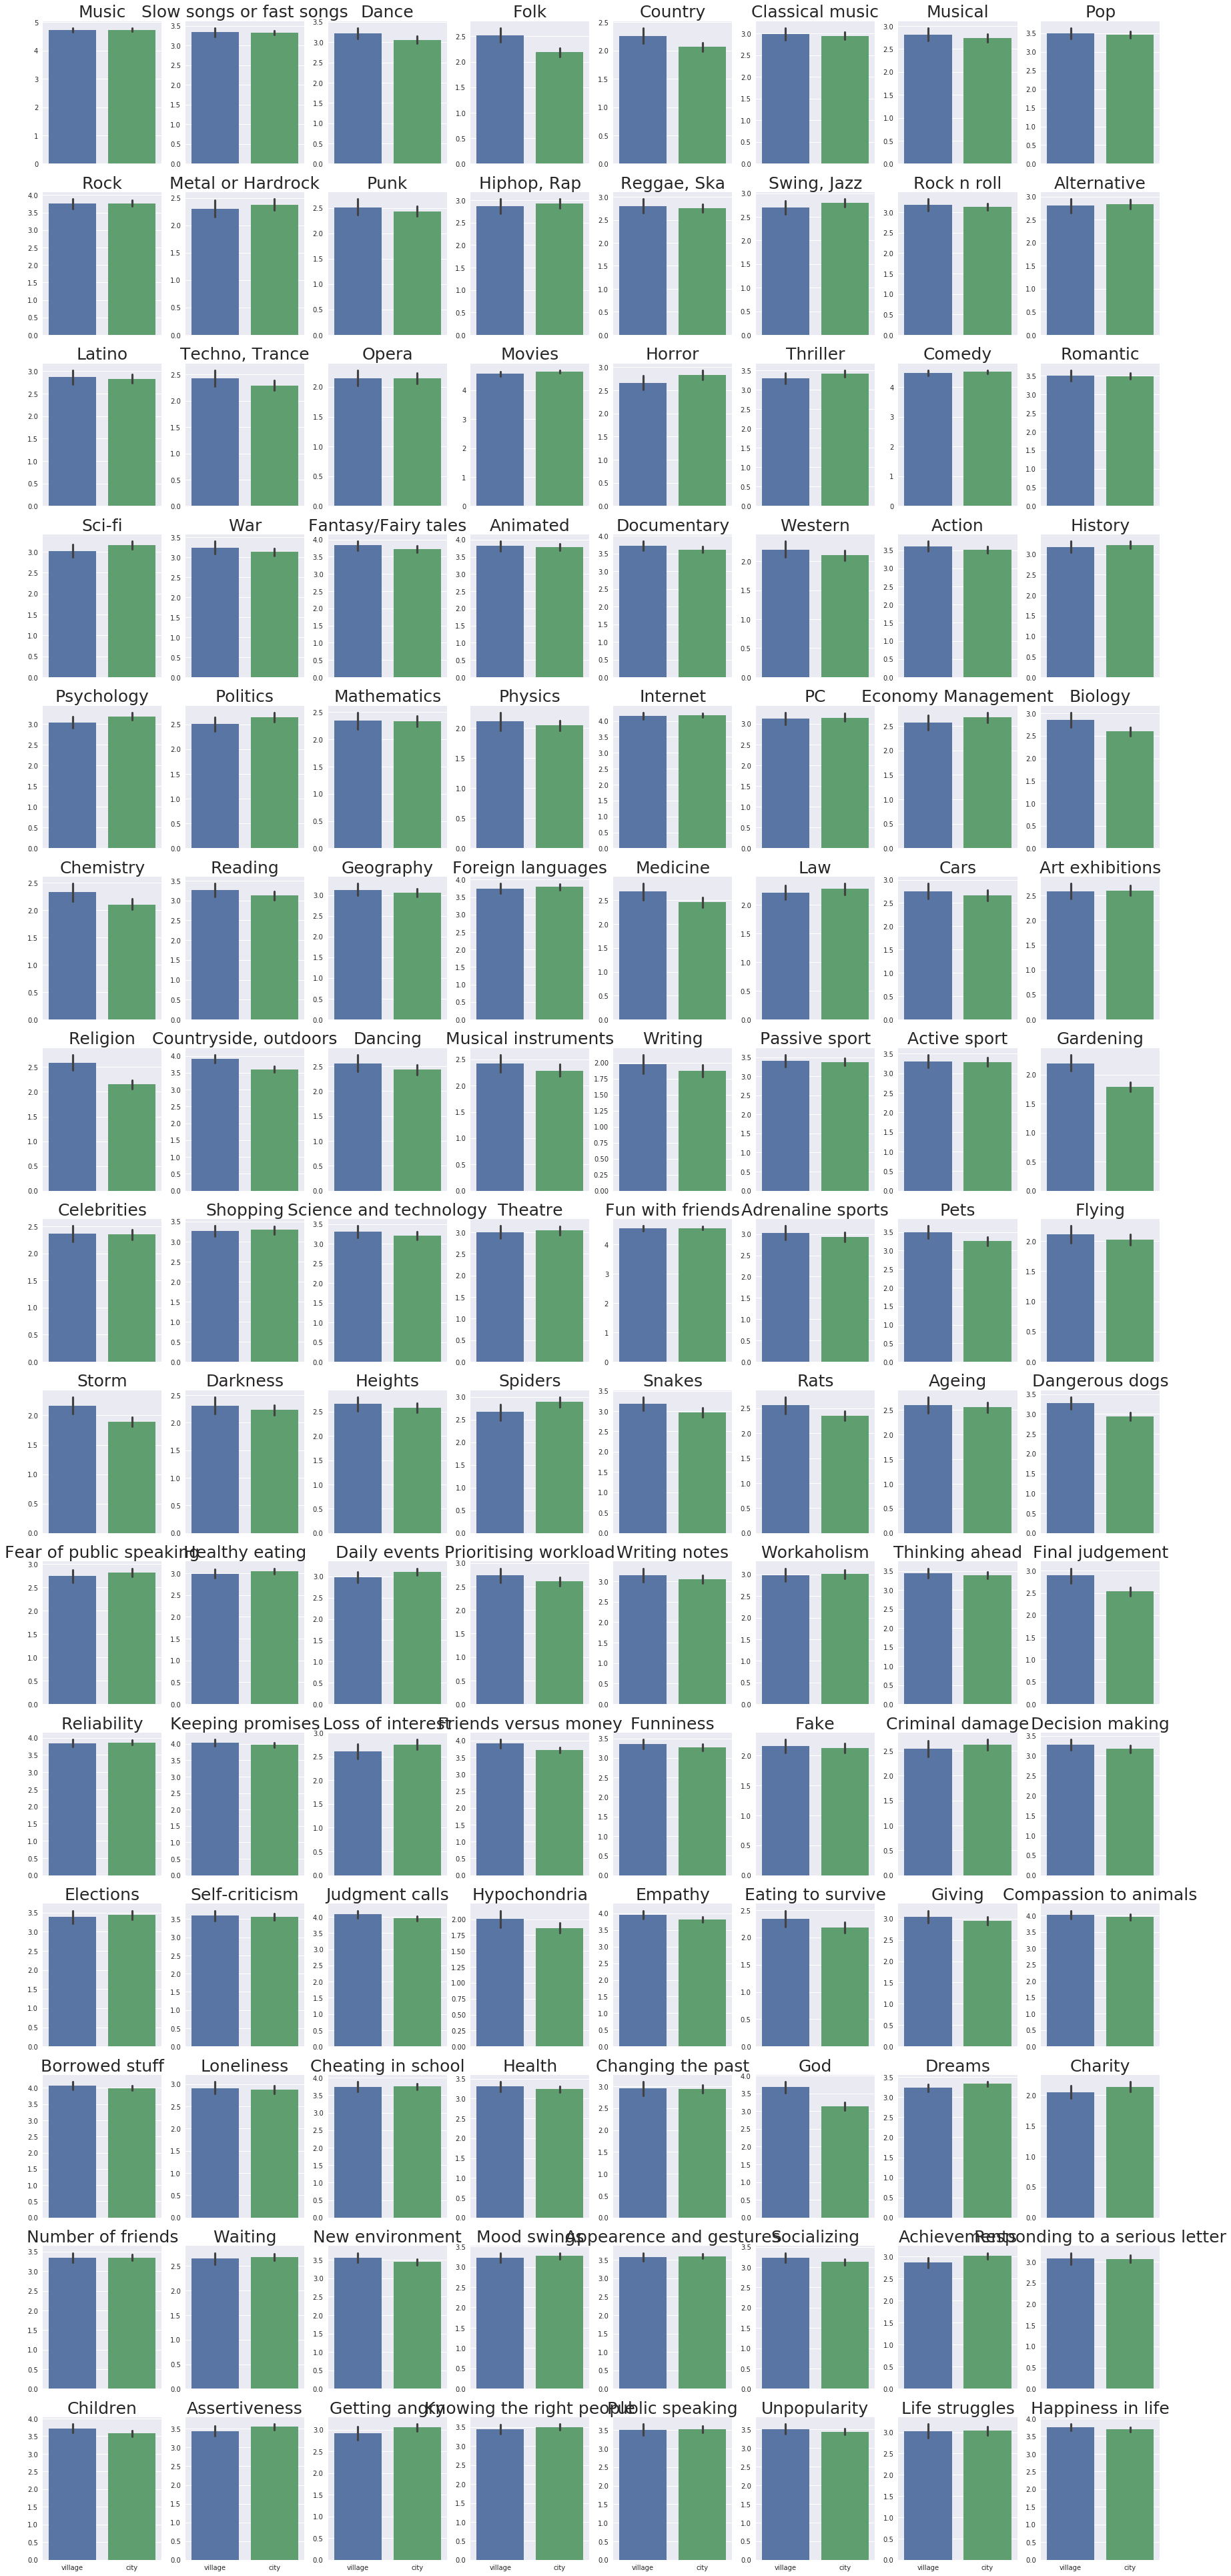

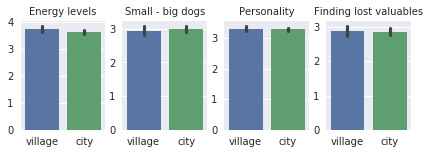

In [542]:
fig, ax = plt.subplots(nrows = 15, ncols = 8,figsize=(30,70), sharex=True)
start = 0
for j in range(15):
    for i in range(8):
        sns.barplot(y=features_int[start], x=var_of_interest, data=young, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(features_int[start], fontsize=25)
        start += 1

fig, ax = plt.subplots(nrows = 1, ncols = 4,figsize=(7,2), sharex=True)

for i in range(4):
    sns.barplot(y=features_int[start], x=var_of_interest, data=young, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(features_int[start], fontsize=10)
    start += 1


Initially I was intened to analyze the difference between left and high handed but the class distribution is even more imbalanced.

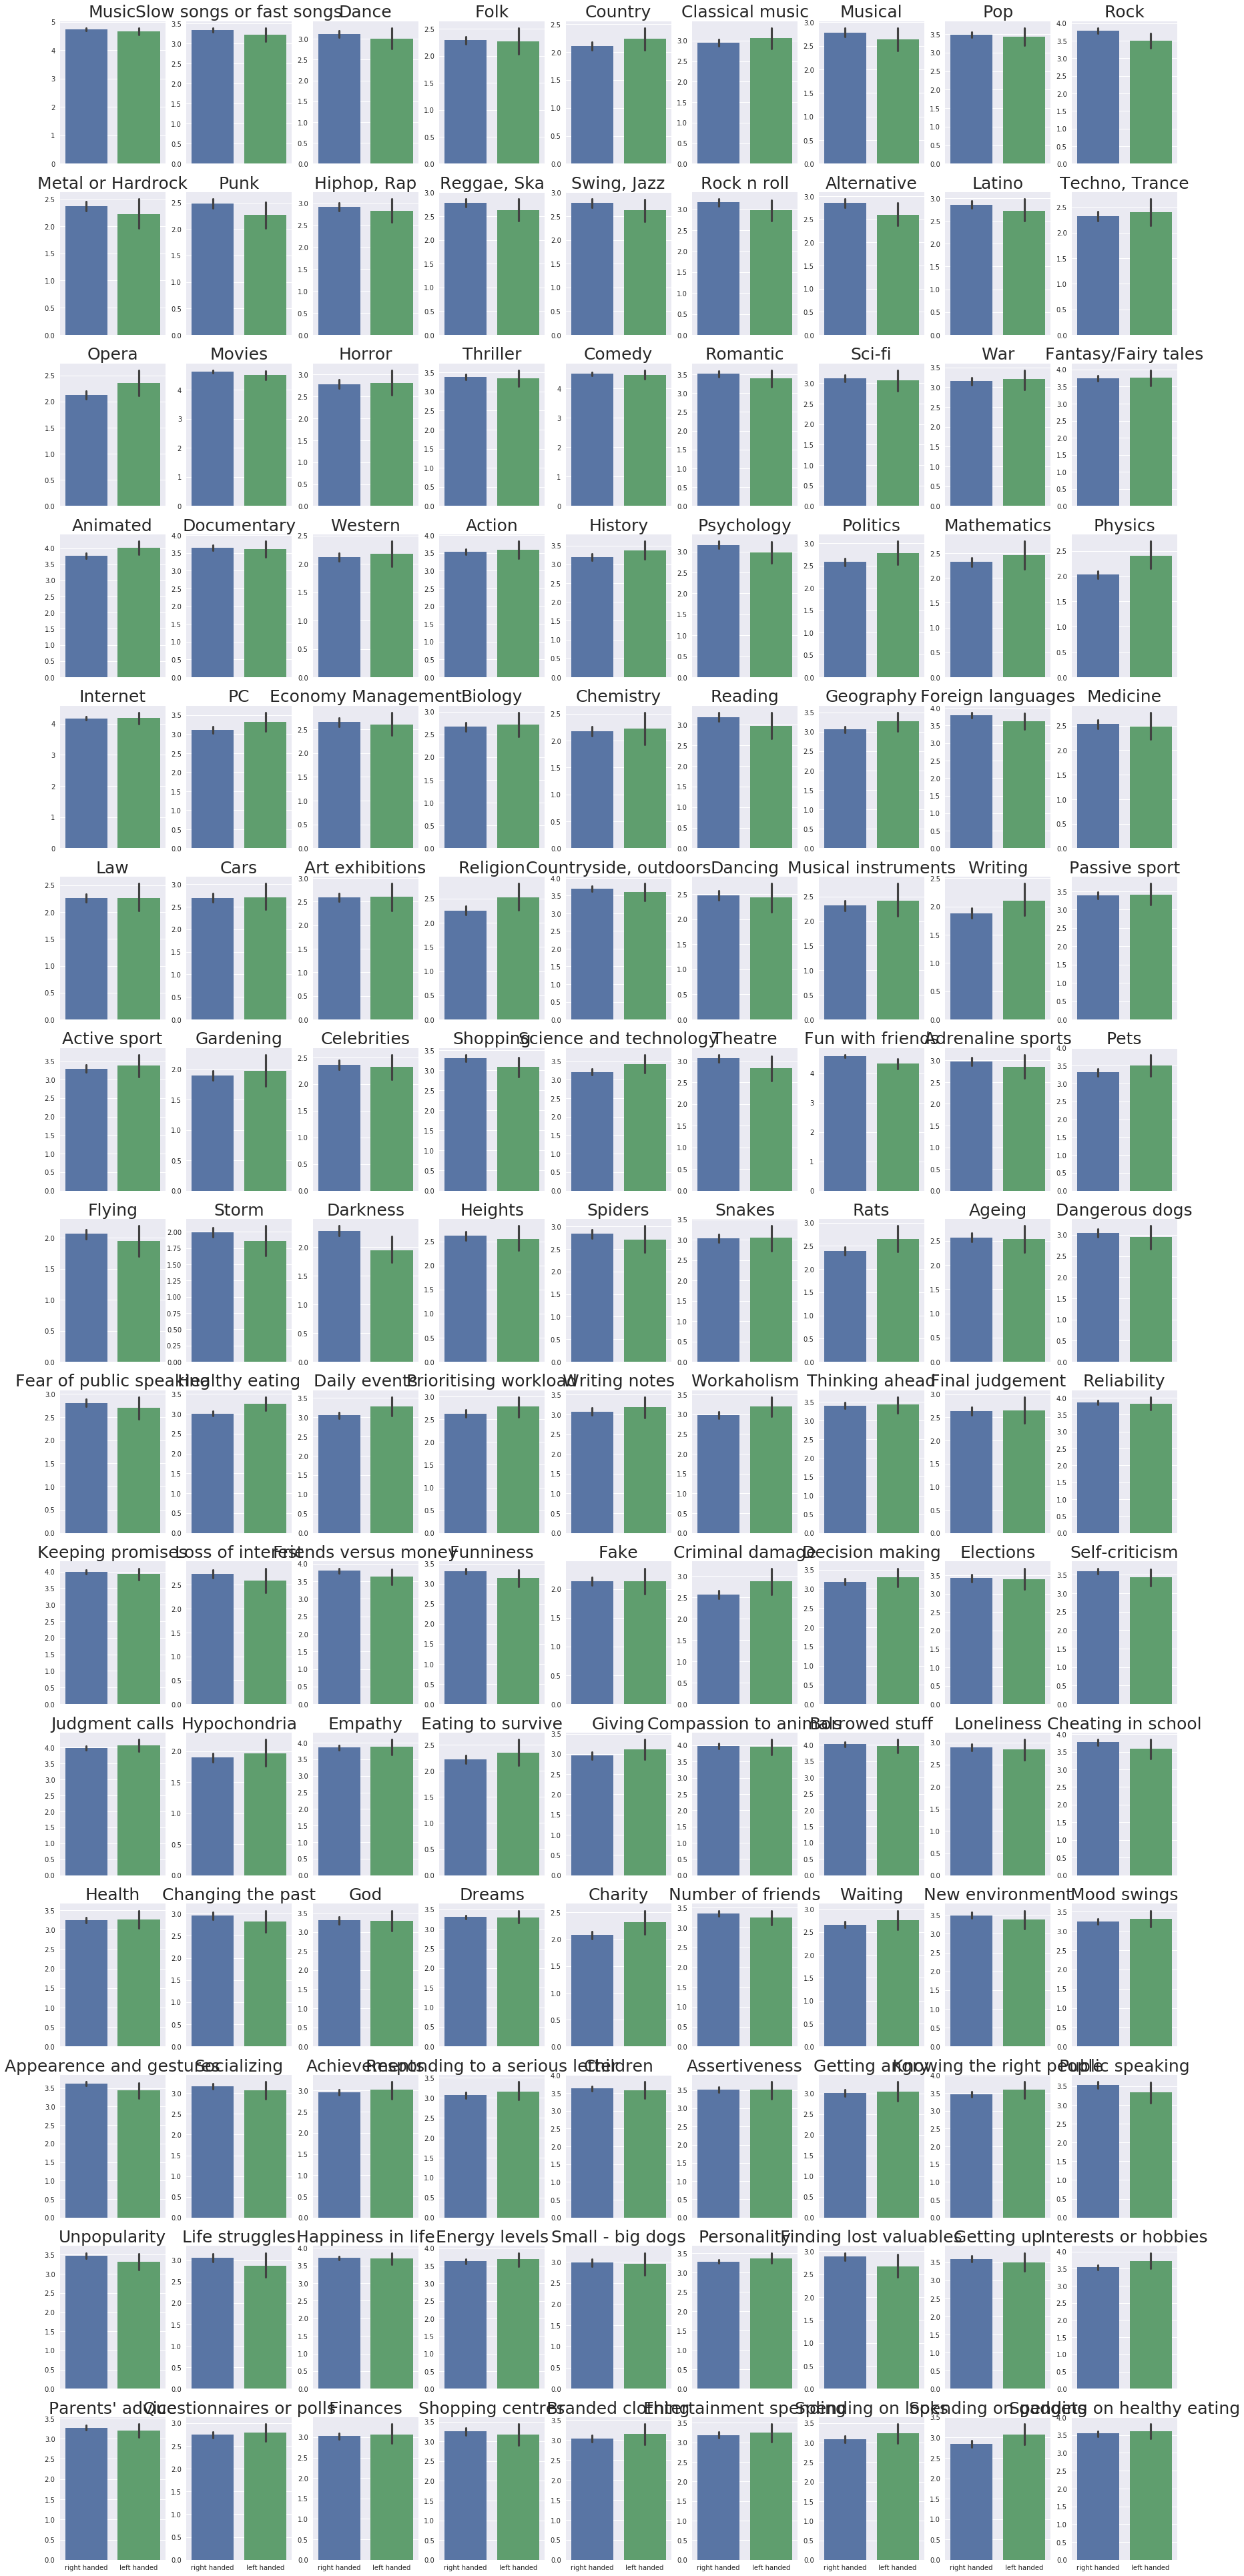

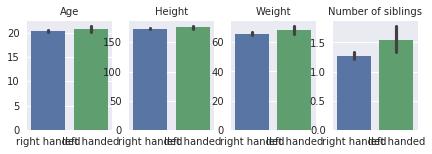

In [543]:
fig, ax = plt.subplots(nrows = 15, ncols = 9,figsize=(30,70), sharex=True)
start = 0
for j in range(15):
    for i in range(9):
        sns.barplot(y=features_int[start], x='Left - right handed', data=young, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(features_int[start], fontsize=25)
        start += 1

fig, ax = plt.subplots(nrows = 1, ncols = 4,figsize=(7,2), sharex=True)
for i in range(4):
    sns.barplot(y=features_int[start], x='Left - right handed', data=young, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(features_int[start], fontsize=10)
    start += 1